In [1]:
#importing the necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataframe
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df['invoice_date'].dtype

dtype('O')

In [4]:
#convert it to a datetime 
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_date'].head()


0   2022-05-08
1   2021-12-12
2   2021-09-11
3   2021-05-16
4   2021-10-24
Name: invoice_date, dtype: datetime64[ns]

In [5]:
#create year and month columns 
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['month'].head()

0     5
1    12
2     9
3     5
4    10
Name: month, dtype: int64

In [6]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021,9
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [7]:
df.groupby('year').sum().reset_index().sort_values(by='price',ascending=False)

,year,age,quantity,price,month
1,2022,1976952,137147,31372826.18,297275
0,2021,1972539,136096,31316304.63,296630
2,2023,369637,25469,5862235.10,30702


# How much did each product make every month for the three years 

In [8]:
product_sale = df.groupby('category')['price'].sum().reset_index().sort_values(by='price',ascending=False)
product_sale


,category,price
1,Clothing,31075684.64
4,Shoes,18135336.89
6,Technology,15772050.00
2,Cosmetics,1848606.90
7,Toys,1086704.64
3,Food & Beverage,231568.71
0,Books,226977.30
5,Souvenir,174436.83


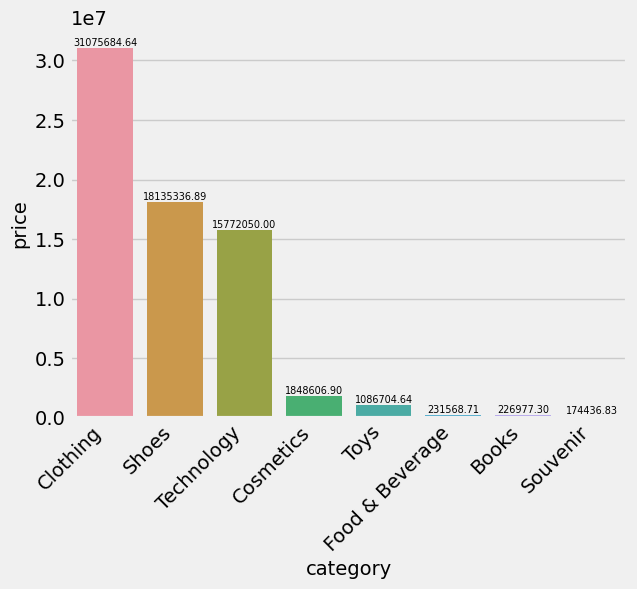

In [66]:
#grouping by category
product_sale = df.groupby('category')['price'].sum().reset_index().sort_values(by='price',ascending=False)
product_sale.head()
containers = sns.barplot(product_sale,x='category',y='price').containers
plt.xticks(rotation= 45,ha='right')
plt.bar_label(containers[0],size=7,fmt='%.2f')
plt.savefig('Product Sales.png', bbox_inches='tight',dpi=55)
plt.show()

# How much was made every month for each year

In [10]:
df['year'].unique()

array([2022, 2021, 2023], dtype=int64)

In [11]:
year_21 = df[df['year'] == 2021] #in 2021,month 7 had the highest sales
year_21.groupby('month')['price'].sum().reset_index().sort_values(ascending=False,by='price')

,month,price
6,7,2767499.65
2,3,2755492.75
9,10,2738863.73
4,5,2678394.69
11,12,2647756.17
3,4,2647497.76
7,8,2584867.89
0,1,2576821.60
5,6,2566936.55
10,11,2499835.01


In [12]:
year_22 = df[df['year'] == 2022] #in 2022 month 10 had the highest sales 
year_22.groupby('month')['price'].sum().reset_index().sort_values(ascending=False,by='price')

,month,price
9,10,2727594.65
0,1,2700665.69
2,3,2687567.35
4,5,2679964.45
11,12,2671718.42
6,7,2649167.06
5,6,2635905.48
8,9,2596237.64
3,4,2589770.93
7,8,2576463.43


In [13]:
year_23 = df[df['year'] == 2023] #the 1st month in 2023 had the highest sales
year_23.groupby('month')['price'].sum().reset_index().sort_values(ascending = False,by='price')

,month,price
0,1,1796920.94
1,2,1775770.11
5,6,301680.27
3,4,276995.69
4,5,257420.54
6,7,256520.43
7,8,252117.95
2,3,246276.50
9,10,207778.80
8,9,194996.06


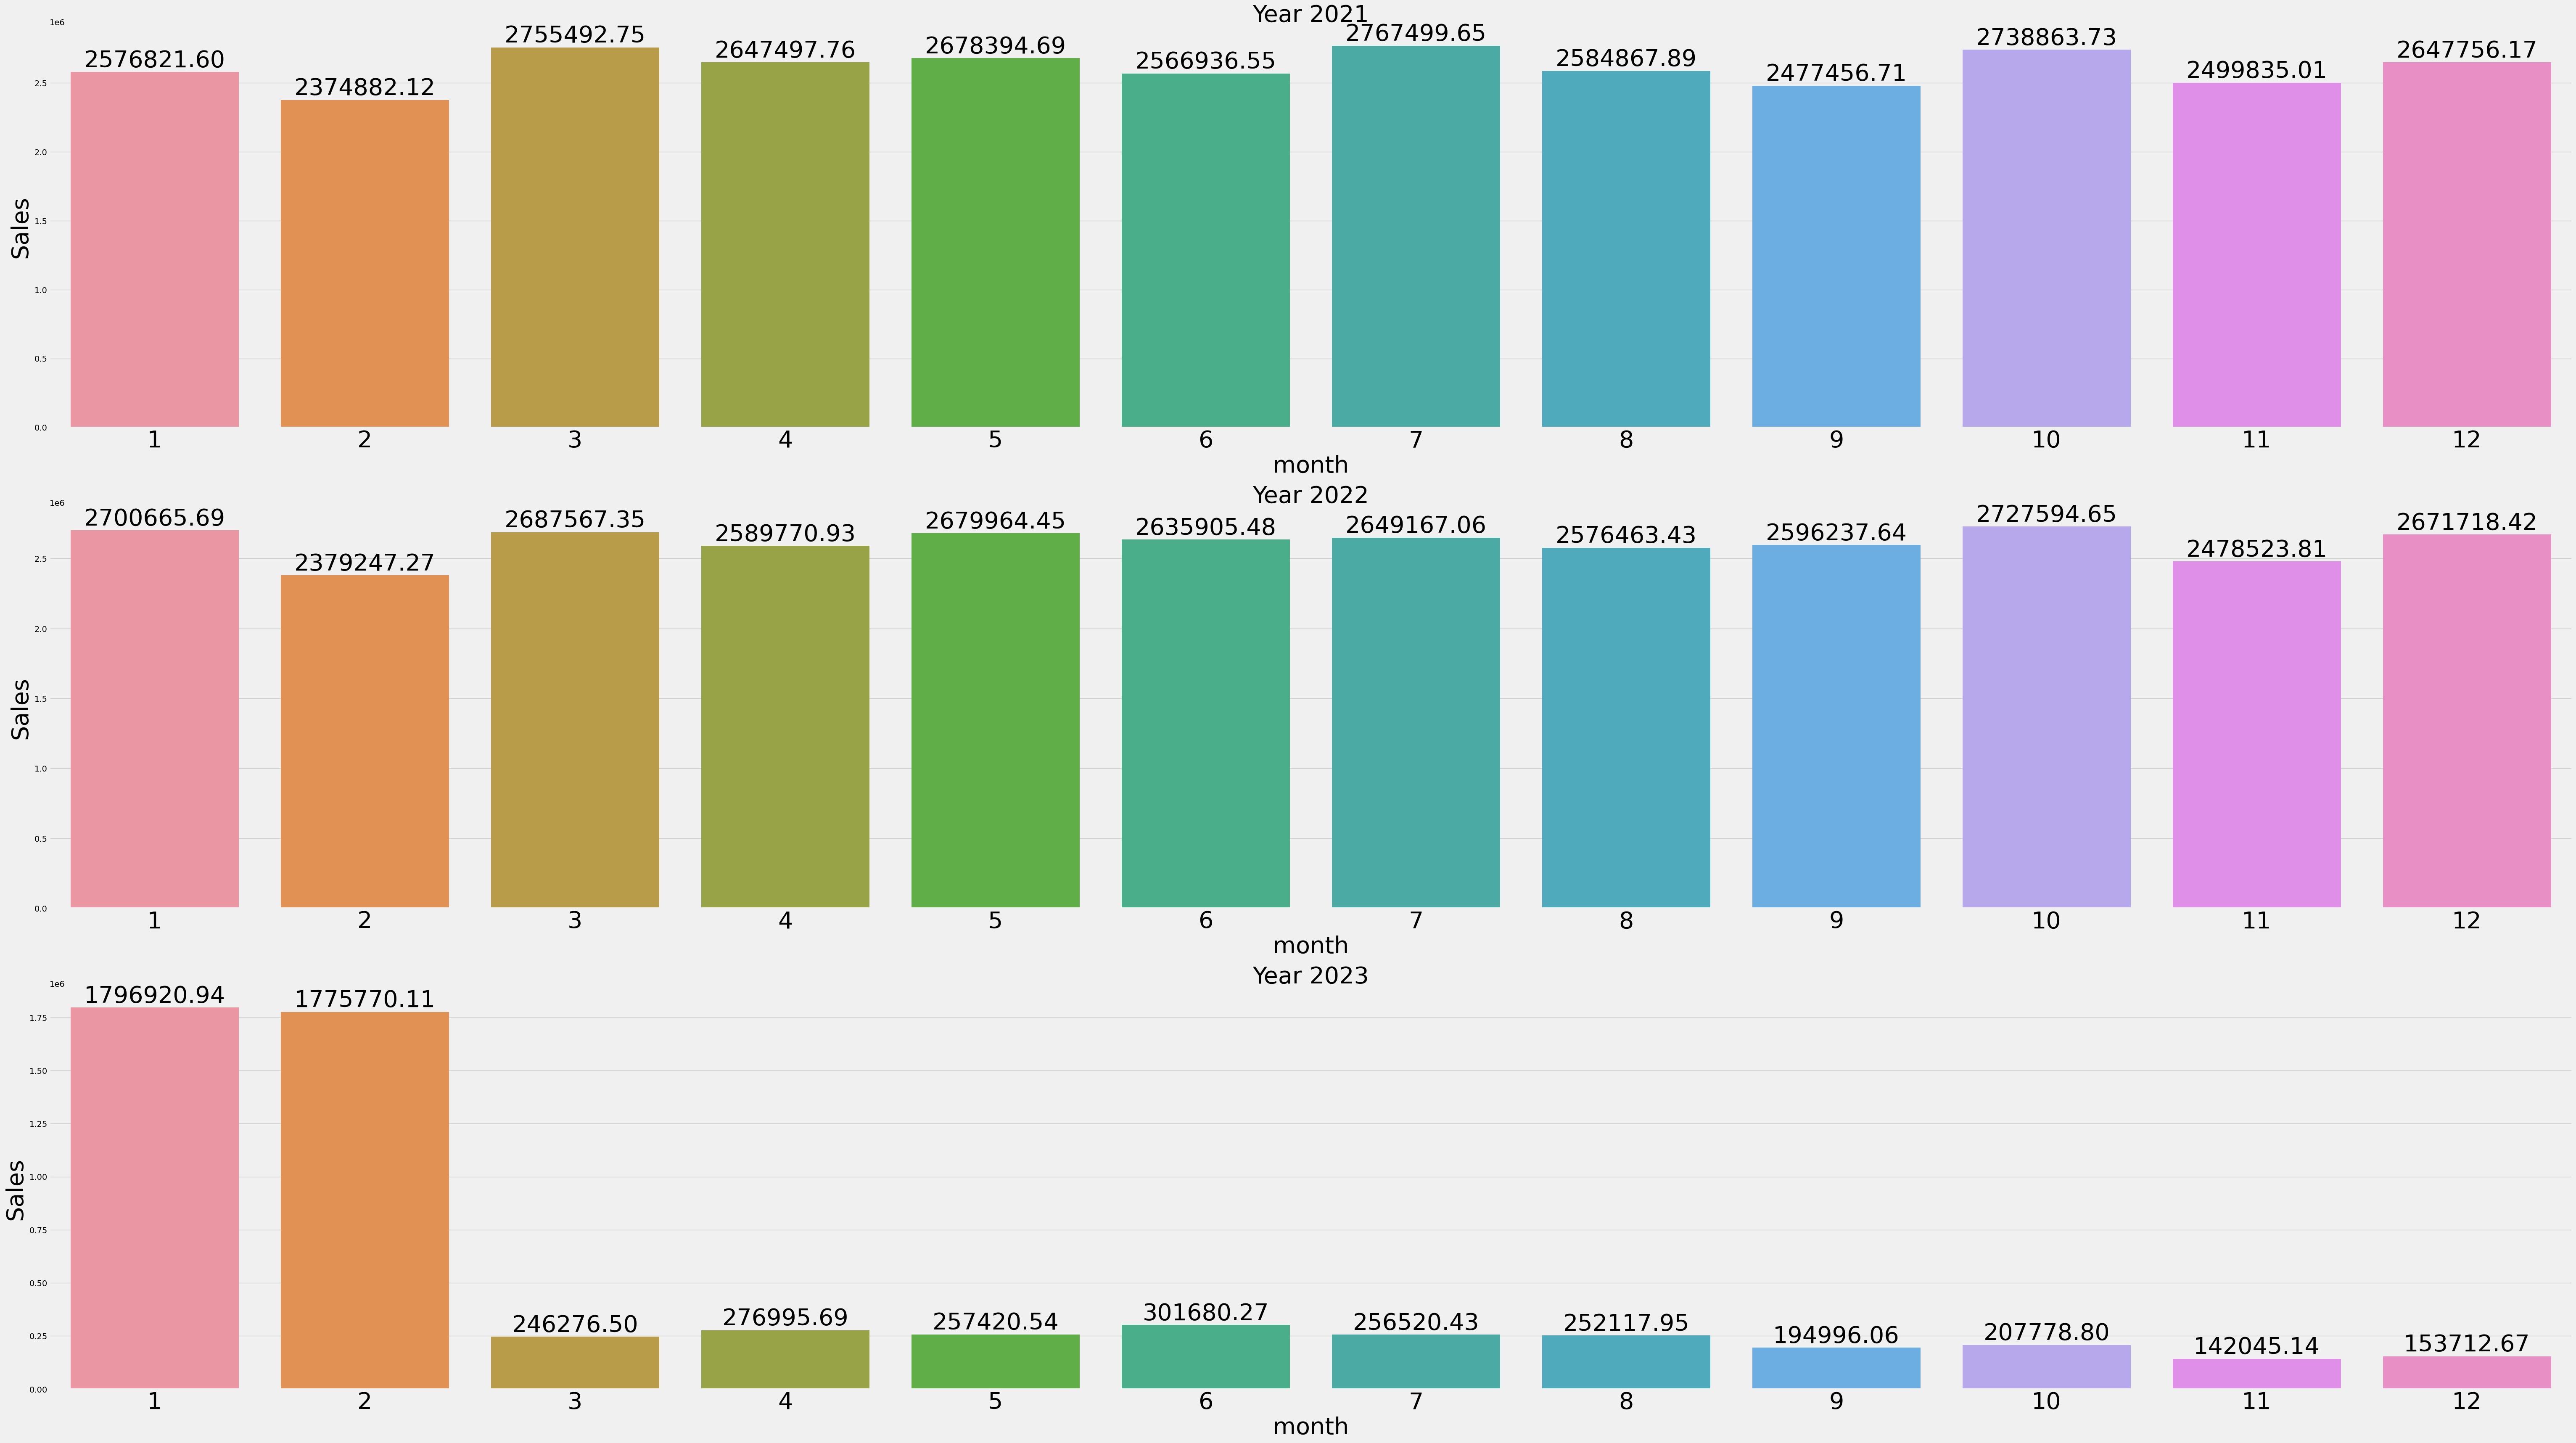

In [122]:
year_21 = df[df['year'] == 2021]
year_21
year_22 = df[df['year'] == 2022]
year_23 = df[df['year'] == 2023]

#ploting based on the month
monthly_21 = year_21.groupby('month').sum().reset_index()
monthly_22 = year_22.groupby('month').sum().reset_index()
monthly_23 = year_23.groupby('month').sum().reset_index()

fig,axes = plt.subplots(3,1,figsize = (80,40))
fig.subplots_adjust(0.2,wspace=0.9)
sns.barplot(x='month',y='price',data=monthly_21,ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(),size=40)
axes[0].set_ylabel('Sales',size=40)
axes[0].set_title('Year 2021',size=40)
axes[0].set_xticklabels(axes[0].get_xticklabels(),size=40)
axes[0].bar_label(axes[0].containers[0],size=40,fmt='%.2f')

sns.barplot(x='month',y='price',data=monthly_22,ax=axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(),size=40)
axes[1].set_ylabel('Sales',size=40)
axes[1].set_title('Year 2022',size=40)
axes[1].set_xticklabels(axes[1].get_xticklabels(),size=40)
axes[1].bar_label(axes[1].containers[0],size=40,fmt='%.2f')

sns.barplot(x='month',y='price',data=monthly_23,ax=axes[2])
axes[2].set_xlabel(axes[2].get_xlabel(),size=40)
axes[2].set_ylabel('Sales',size=40)
axes[2].set_title('Year 2023',size=40)
axes[2].set_xticklabels(axes[2].get_xticklabels(),size=40)
axes[2].bar_label(axes[2].containers[0],size=40,fmt='%.2f')
plt.savefig('monthly-year Sales.png',bbox_inches='tight',dpi=10)
plt.show()

[Text(0, 0, '2576821.60'),
 Text(0, 0, '2374882.12'),
 Text(0, 0, '2755492.75'),
 Text(0, 0, '2647497.76'),
 Text(0, 0, '2678394.69'),
 Text(0, 0, '2566936.55'),
 Text(0, 0, '2767499.65'),
 Text(0, 0, '2584867.89'),
 Text(0, 0, '2477456.71'),
 Text(0, 0, '2738863.73'),
 Text(0, 0, '2499835.01'),
 Text(0, 0, '2647756.17')]

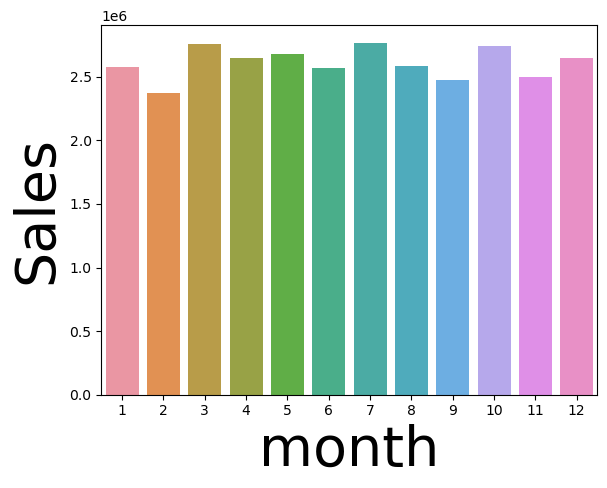

In [15]:
sns.barplot(x='month',y='price',data=monthly_21)
plt.xlabel('month',size=40)
plt.ylabel('Sales',size=40)
axes[0].set_xlabel(axes[0].get_xlabel(),size=40)
axes[0].set_ylabel('Sales',size=40)
axes[0].set_title('Year 2021',size=40)
axes[0].set_xticklabels(axes[0].get_xticklabels(),size=40)
axes[0].bar_label(axes[0].containers[0],size=40,fmt='%.2f')

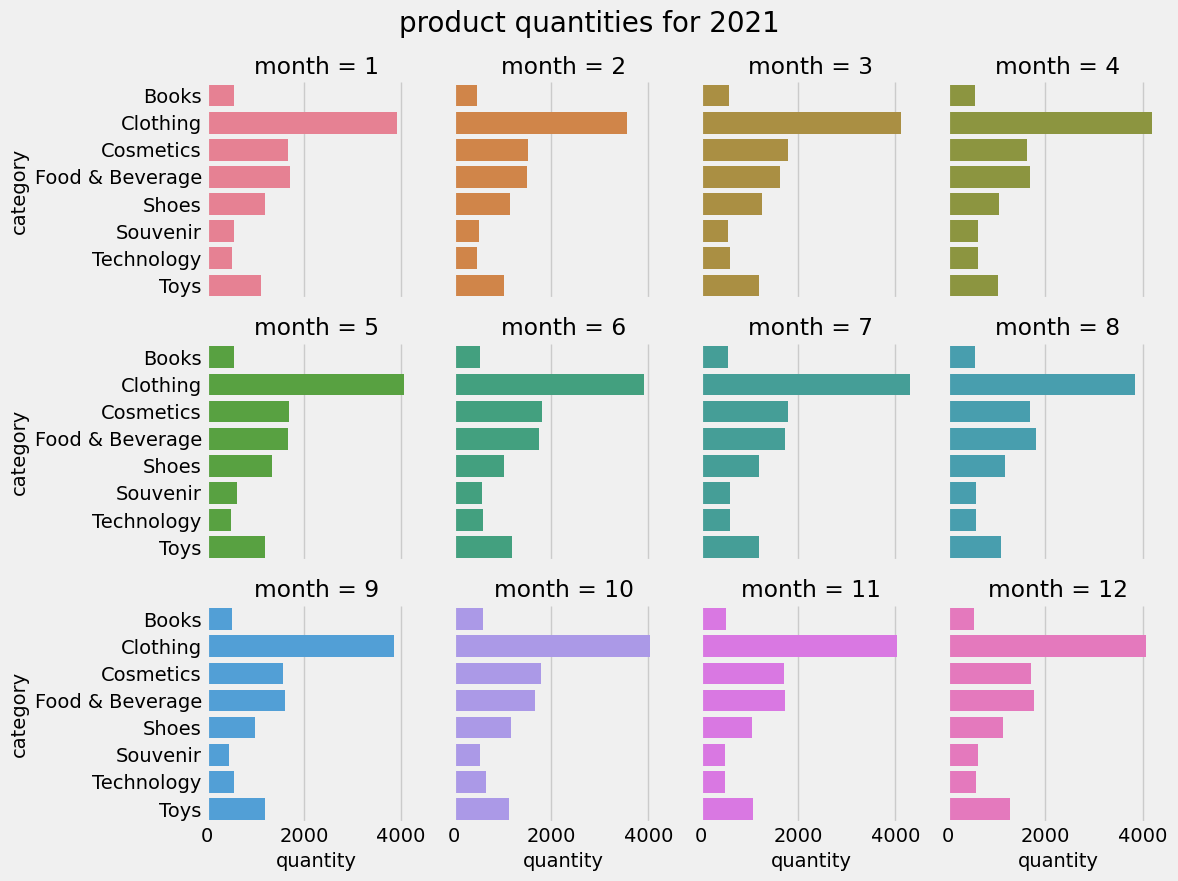

In [74]:
month_product_21 = year_21.groupby(['month','category']).sum().reset_index()
g = sns.FacetGrid(month_product_21,col='month',hue='month',col_wrap=4)
g.map(sns.barplot,'quantity','category')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('product quantities for 2021',size=20)
plt.savefig('product quantities for 2021.png',bbox_inches='tight',dpi=33)
#in the year 2021,clothes had the highest quantities sold compared to other products
#sold in the malls 

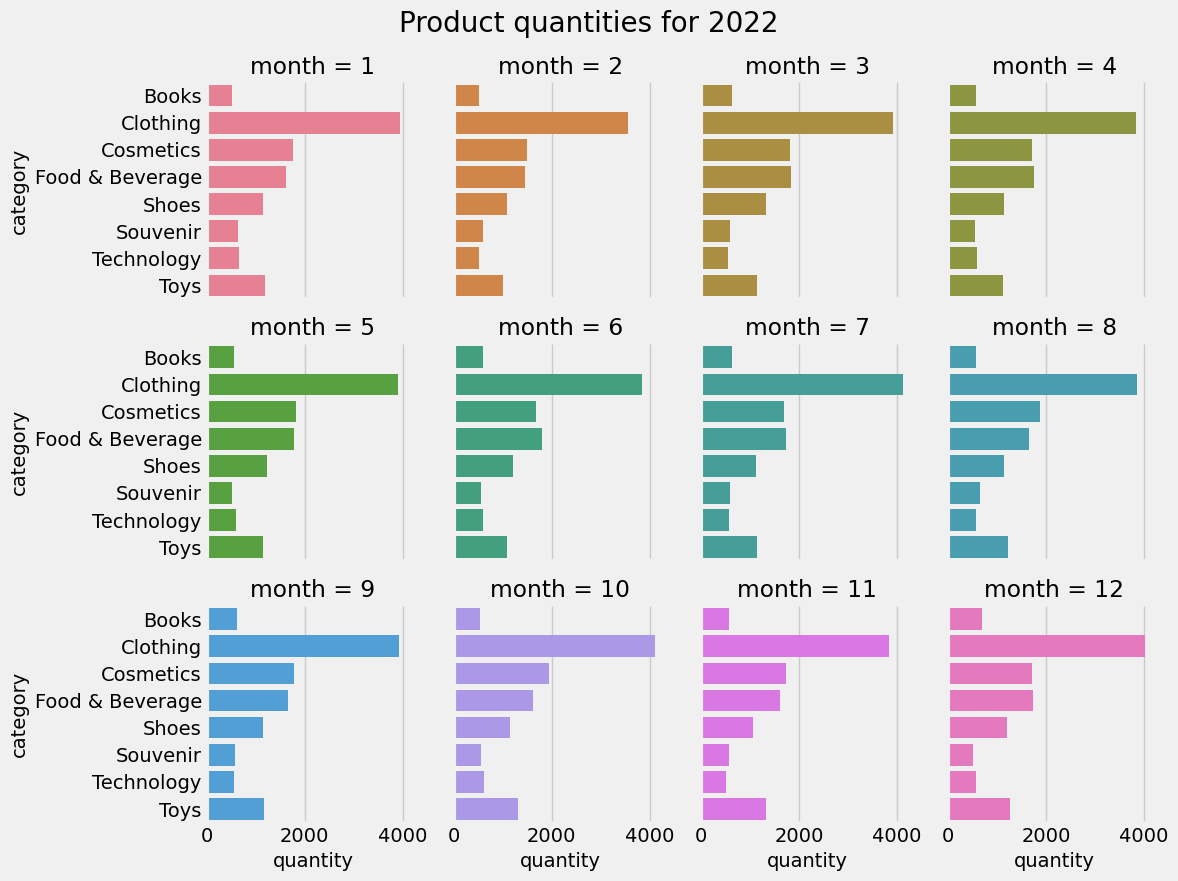

In [76]:
monthly_product_22 = year_22.groupby(['month','category']).sum().reset_index()
h = sns.FacetGrid(monthly_product_22,col='month',hue='month',col_wrap=4)
h.map(sns.barplot,'quantity','category')
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Product quantities for 2022',fontsize=20)
# plt.title('product quantities for 2022',size=30)
plt.savefig('product quantities for 2022.png',bbox_inches='tight',dpi=33)

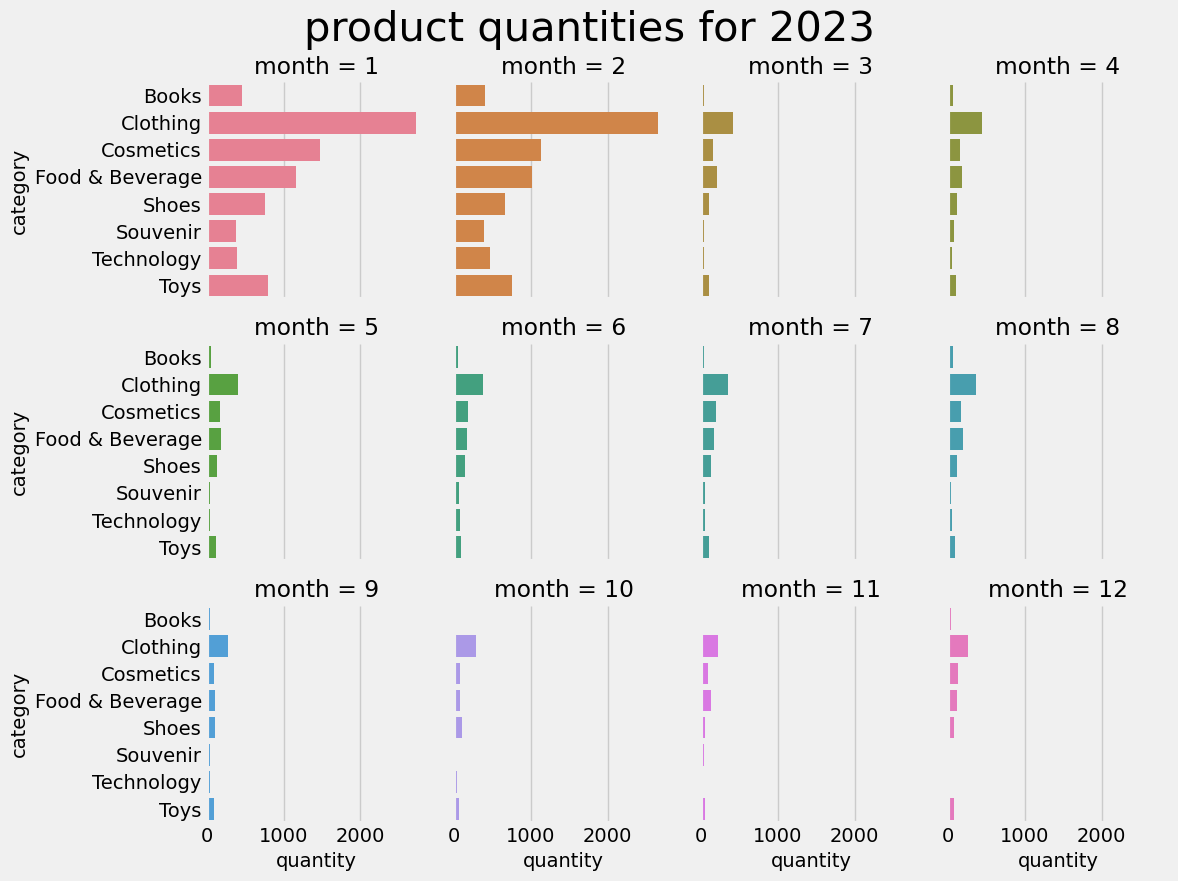

In [77]:
month_product_23 = year_23.groupby(['month','category']).sum().reset_index()
k = sns.FacetGrid(month_product_23,col='month',col_wrap=4,hue='month')
k.map(sns.barplot,'quantity','category')
k.fig.subplots_adjust(top=0.9)
k.fig.suptitle('product quantities for 2023',fontsize=30) 
# plt.title('product quantities for 2023.',size=20)
plt.savefig('product quantities for 2023.png',bbox_inches='tight',dpi=33)
#from this we can see that the quantity of  different products was very low
#but clothes still stood out with the highest number of quantities 

In [19]:
df.shape

(99457, 12)

DEFINING THE PROBLEM STATEMENT
How can we increase the sales of clothing in the mall thats having the least amount of sales when it comes to selling clothes 
Predict the sales for 2024/2025 for that mall

# DATA CLEANING


In [20]:
#dropping duplicates
df.loc[df.duplicated()]
df.drop_duplicates(inplace=True)
#no duplicates found

In [21]:
#identifying null values
df.isnull().sum()  # there are no null values

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
year              0
month             0
dtype: int64

In [22]:
#dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  year            99457 non-null  int64         
 11  month           99457 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 9.9+ MB


In [23]:
#converting invoice date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_date'].head(3)

0   2022-05-08
1   2021-12-12
2   2021-09-11
Name: invoice_date, dtype: datetime64[ns]

In [24]:
df['invoice_date'].dtype

dtype('<M8[ns]')

In [25]:
#Analyzing the invoice no
def check_invoice_no(series):
    condition = series.apply(lambda x : x.startswith("I") and x[1:].isdigit() and len(x) == 7)
    
    return condition.all()
result = check_invoice_no(df['invoice_no'])
result

True

In [26]:
#Analyzing customer_id
def check_customer_id(series):
    condition = series.apply(lambda x : x.startswith("C") and x[1:].isdigit() and len(x) == 7)
    
    return condition.all()
result = check_customer_id(df['customer_id'])
result

True

In [27]:
#focus is on clothing
cloth_df = df.loc[df['category'] == 'Clothing']
cloth_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022,5
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021,9
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,2022,5
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,2021,1
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity,2021,4


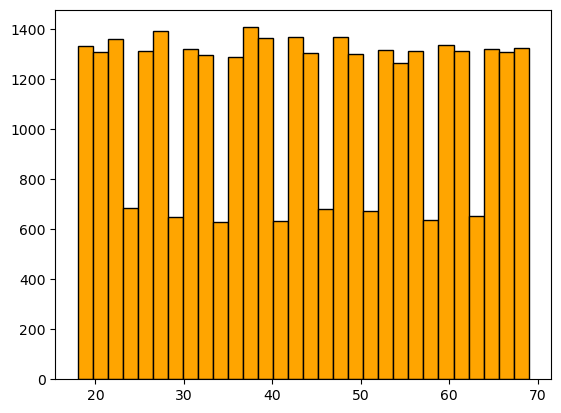

In [28]:
plt.hist(cloth_df['age'],bins=30,edgecolor='black',color='orange')
plt.show()

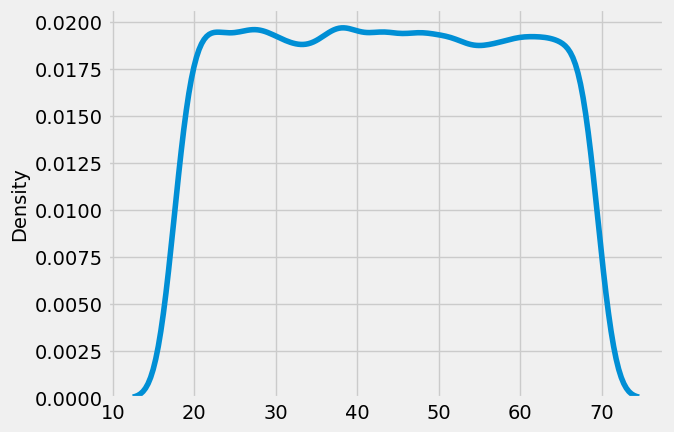

In [83]:
sns.distplot(x=cloth_df['age'],hist=False)
plt.savefig('age distribution.png',bbox_inches='tight',dpi=40)

In [30]:
age_gender= cloth_df.groupby(['age','gender'])['price'].sum().reset_index()
male_max_sales = age_gender[age_gender['gender'] == 'Male']['price'].idxmax()
male_max_sales
age_gender.loc[male_max_sales]
#43 year old males made a huge contribution to the sales of clothes

age              43
gender         Male
price     284775.92
Name: 51, dtype: object

In [31]:
age_gender.loc[age_gender['age'] == 64]

,age,gender,price
92,64,Female,410509.44
93,64,Male,247265.92


In [32]:
fem_max_sales = age_gender[age_gender['gender'] == 'Female']['price'].idxmax()
age_gender.loc[fem_max_sales]
#37 year old women made more contribution to the revenue of female clothes

age              37
gender       Female
price     412910.08
Name: 38, dtype: object

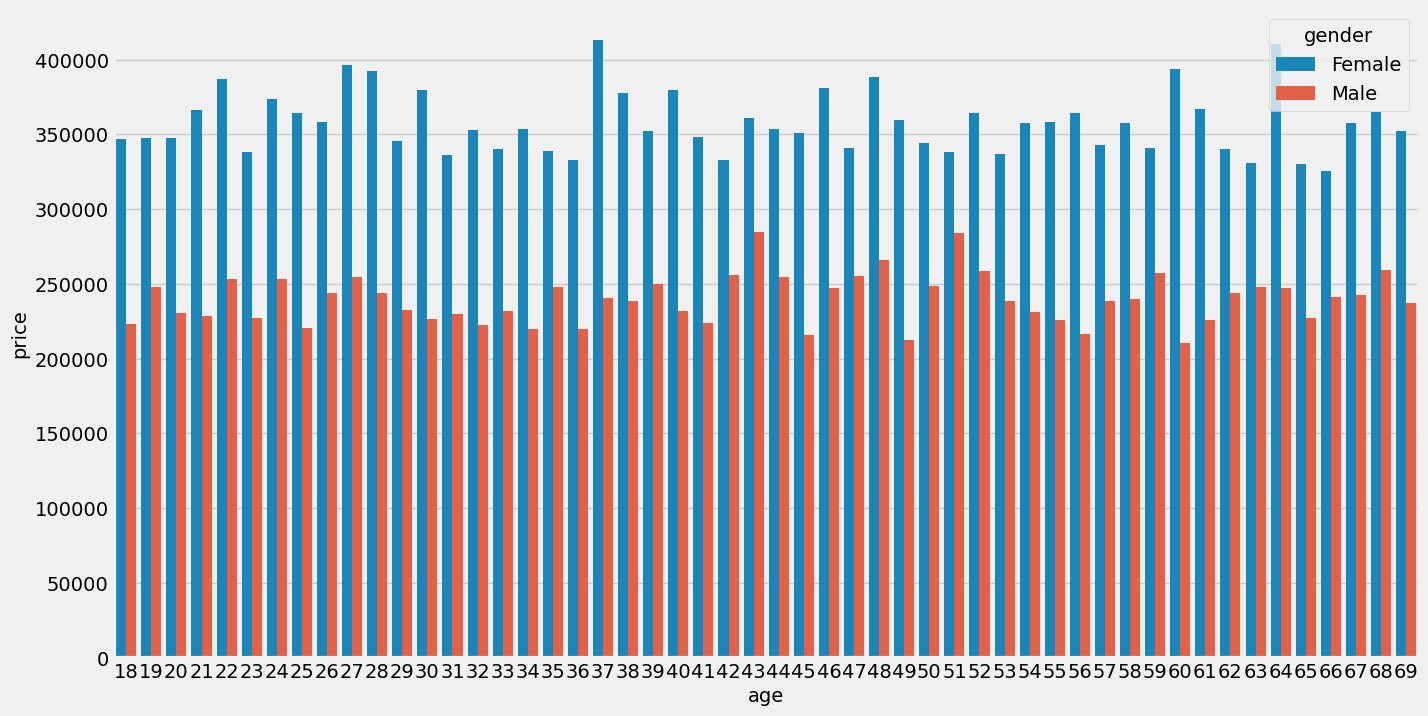

In [85]:
age_gender= cloth_df.groupby(['age','gender'])['price'].sum().reset_index()
plt.figure (figsize=(15,8))
sns.barplot(x='age',y='price',hue='gender',data=age_gender)
plt.savefig('age-gender distribution.png',bbox_inches='tight',dpi=35)

# Sale of clothes for various months in the 3years

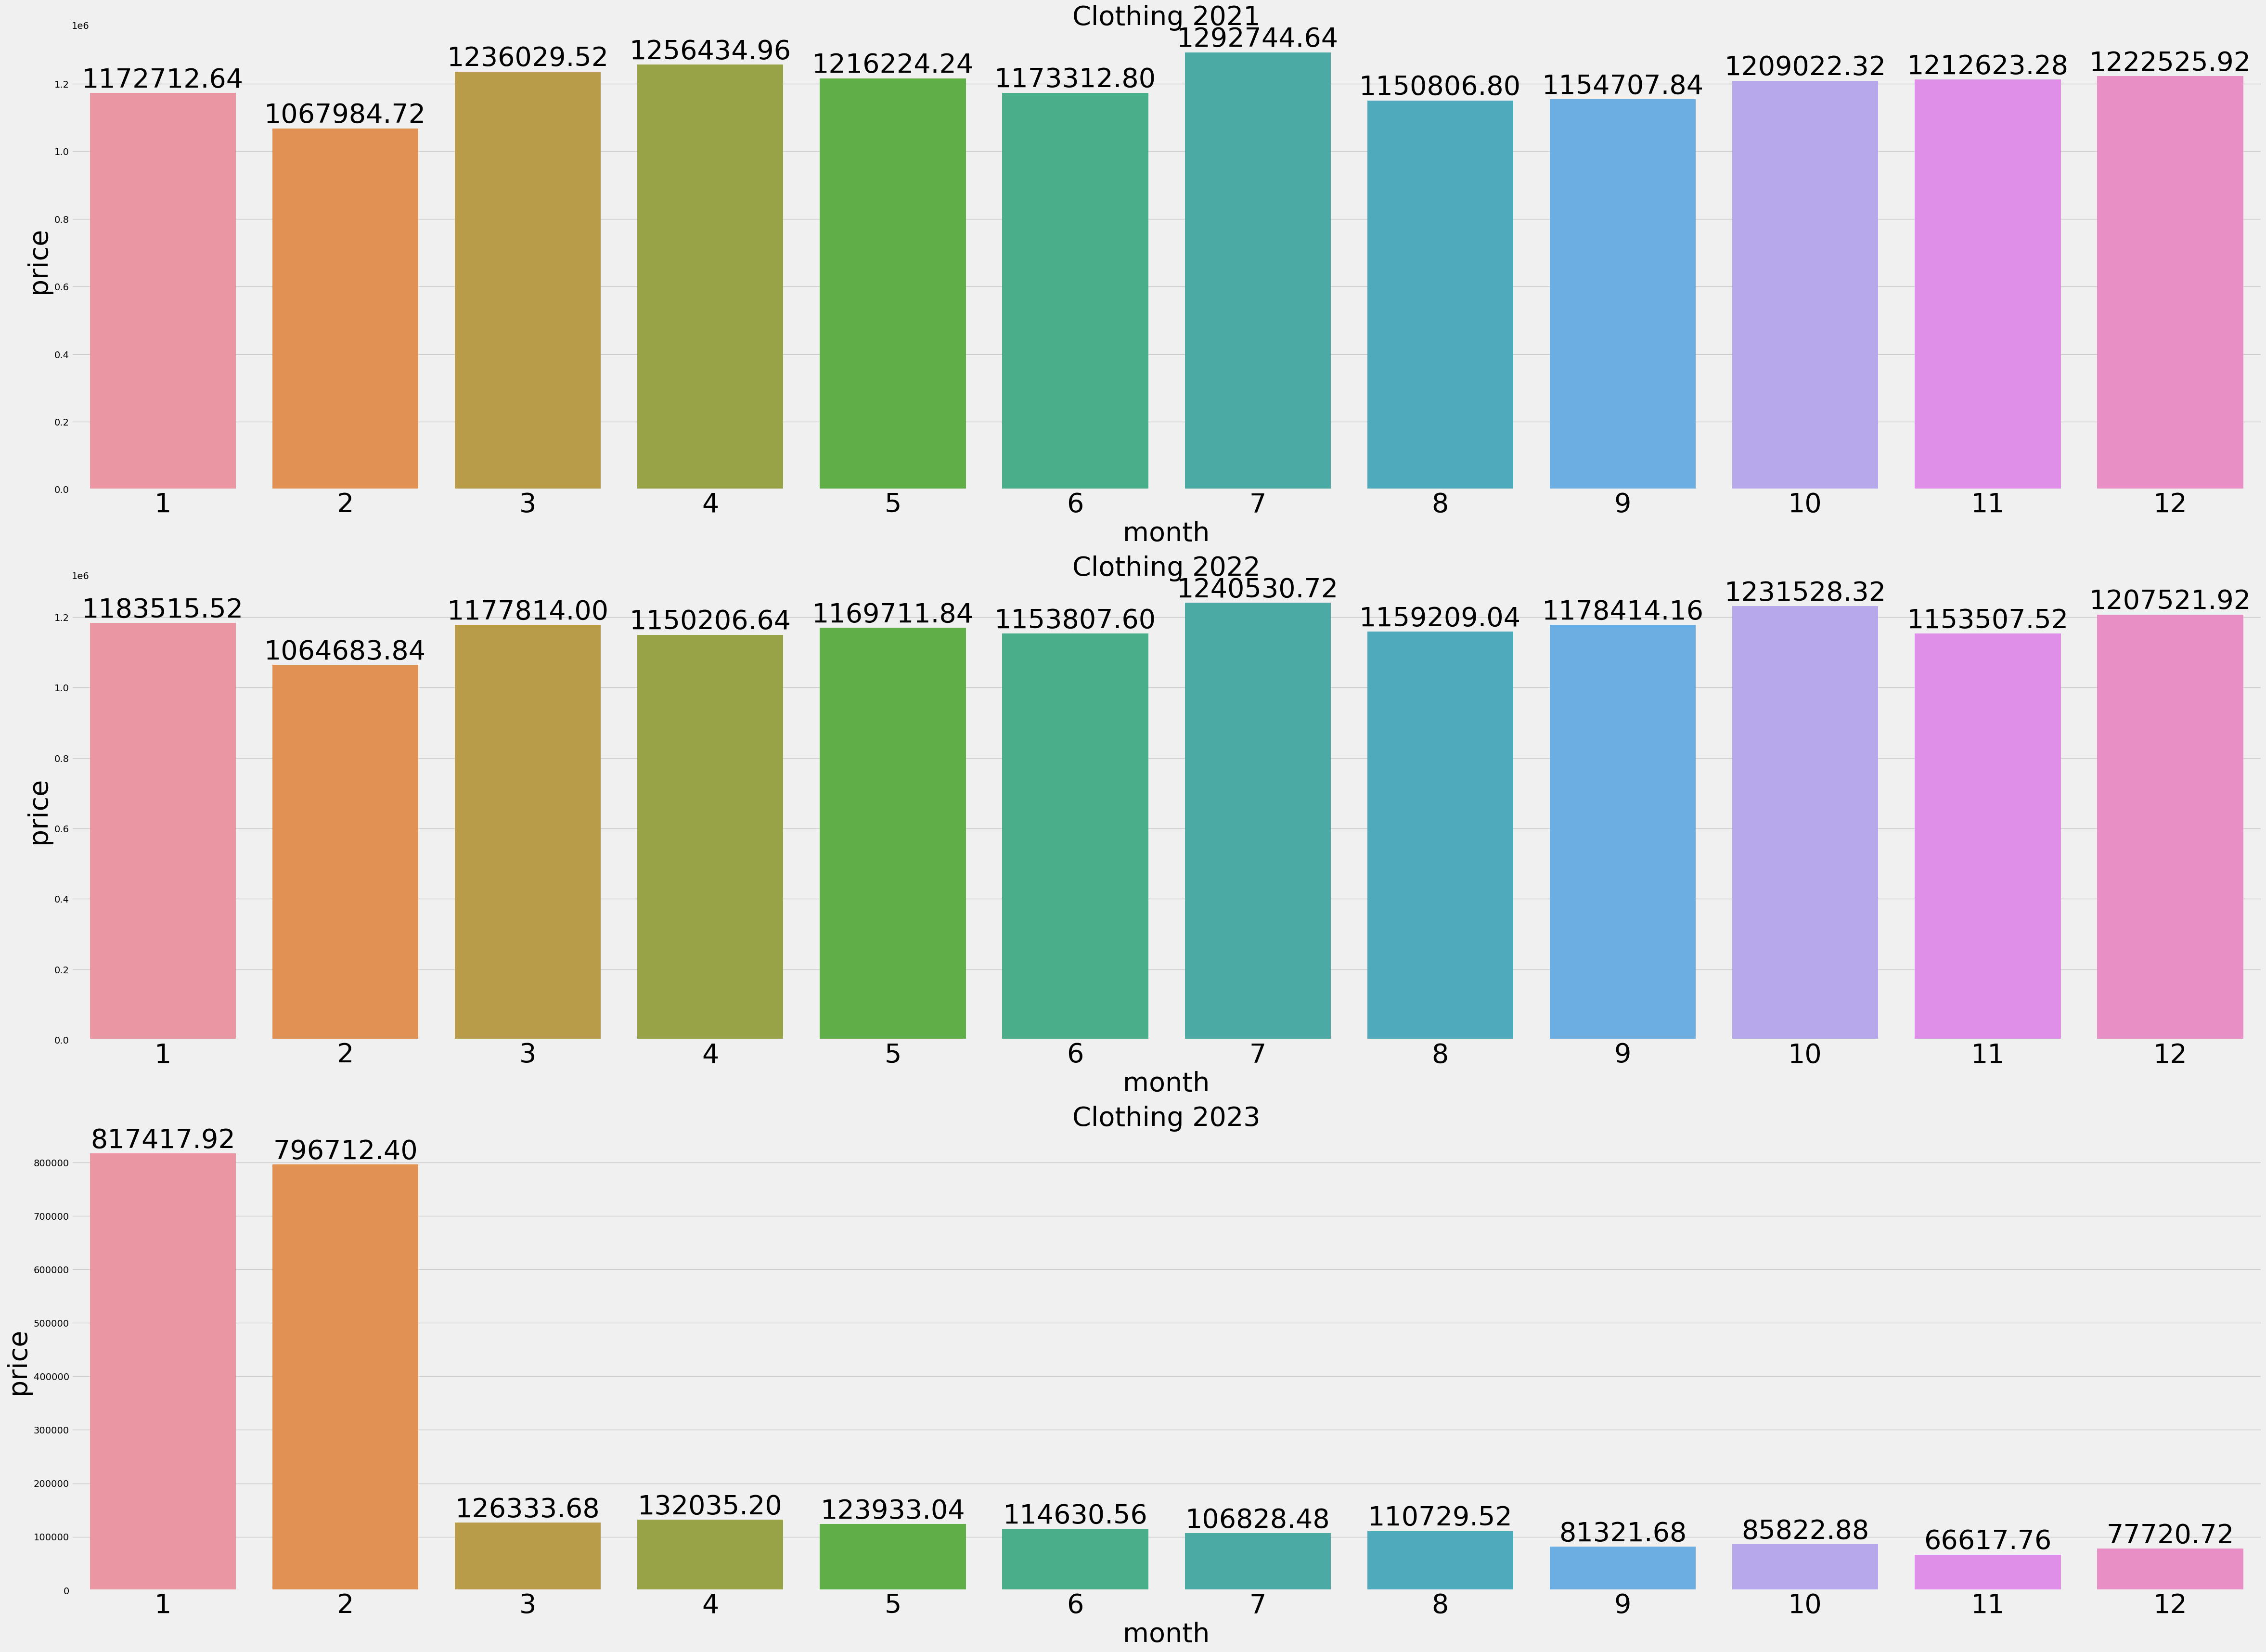

In [80]:
clothes_21 = cloth_df[cloth_df['year'] == 2021]
clothes_22 = cloth_df[cloth_df['year'] == 2022]
clothes_23 = cloth_df[cloth_df['year'] == 2023]

monthly_clothes_21 = clothes_21.groupby('month').sum().reset_index()
monthly_clothes_22 = clothes_22.groupby('month').sum().reset_index()
monthly_clothes_23 = clothes_23.groupby('month').sum().reset_index()

fig,axes = plt.subplots(3,1,figsize=(70,40))
fig.subplots_adjust(0.3)
sns.barplot(data=monthly_clothes_21,x='month',y='price',ax = axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(),size=40)
axes[0].set_ylabel(axes[0].get_ylabel(),size=40)
axes[0].set_title('Clothing 2021',size=40)
axes[0].bar_label(axes[0].containers[0],size=40,fmt='%.2f')
axes[0].set_xticklabels(axes[0].get_xticklabels(),size=40)


sns.barplot(data=monthly_clothes_22,x='month',y='price',ax = axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(),size=40)
axes[1].set_ylabel(axes[1].get_ylabel(),size=40)
axes[1].set_title('Clothing 2022',size=40)
axes[1].bar_label(axes[1].containers[0],size=40,fmt='%.2f')
axes[1].set_xticklabels(axes[1].get_xticklabels(),size=40)


sns.barplot(data=monthly_clothes_23,x='month',y='price',ax = axes[2])
axes[2].set_xlabel(axes[2].get_xlabel(),size=40)
axes[2].set_ylabel(axes[2].get_ylabel(),size=40)
axes[2].set_title('Clothing 2023',size=40)
axes[2].bar_label(axes[2].containers[0],size=40,fmt='%.2f')
axes[2].set_xticklabels(axes[2].get_xticklabels(),size=40)
plt.savefig('Monthly clothing sales.png',bbox_inches='tight',dpi=10)
plt.show()

In [35]:
monthly_clothes_21.loc[monthly_clothes_21['price'].idxmax()]
#month 7 in 2021 had the highest sales of clothes 

month             7.00
age           61915.00
quantity       4308.00
price       1292744.64
year        2904177.00
Name: 6, dtype: float64

In [36]:
monthly_clothes_21.loc[monthly_clothes_21['price'].idxmin()]
#feb

month             2.00
age           51101.00
quantity       3559.00
price       1067984.72
year        2404990.00
Name: 1, dtype: float64

In [37]:
monthly_clothes_22.loc[monthly_clothes_22['price'].idxmax()]
#month 7 had the highest sales  of clothes in 2022

month             7.00
age           58768.00
quantity       4134.00
price       1240530.72
year        2758008.00
Name: 6, dtype: float64

In [38]:
monthly_clothes_22.loc[monthly_clothes_22['price'].idxmin()] #also in feb

month             2.00
age           51549.00
quantity       3548.00
price       1064683.84
year        2400114.00
Name: 1, dtype: float64

In [39]:
monthly_clothes_23.loc[monthly_clothes_23['price'].idxmax()]
#january had the highest sale of clothes in 2023                                                               

month             1.00
age           39407.00
quantity       2724.00
price        817417.92
year        1867229.00
Name: 0, dtype: float64

In [40]:
monthly_clothes_23.loc[monthly_clothes_23['price'].idxmin()]

month           11.00
age           3387.00
quantity       222.00
price        66617.76
year        155771.00
Name: 10, dtype: float64

# How clothes sold in the various malls

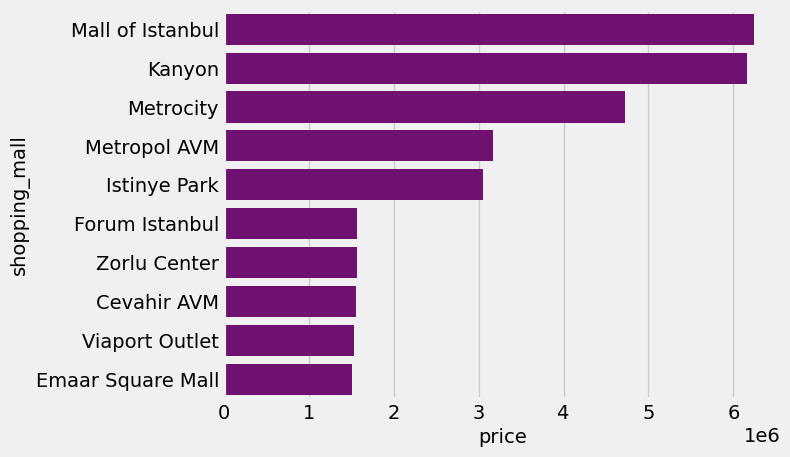

In [91]:
total_mall_sales = cloth_df.groupby(['shopping_mall']).sum().reset_index()
total_mall_sorted = total_mall_sales.sort_values(by='price',ascending=False)
sns.barplot(data=total_mall_sorted,x='price',y ='shopping_mall',orient='h',color='purple')
plt.style.use('fivethirtyeight')
plt.savefig('mall Sales.png', bbox_inches='tight',dpi=45)

Text(0.5, 0.98, 'Shopping mall sales 2021')

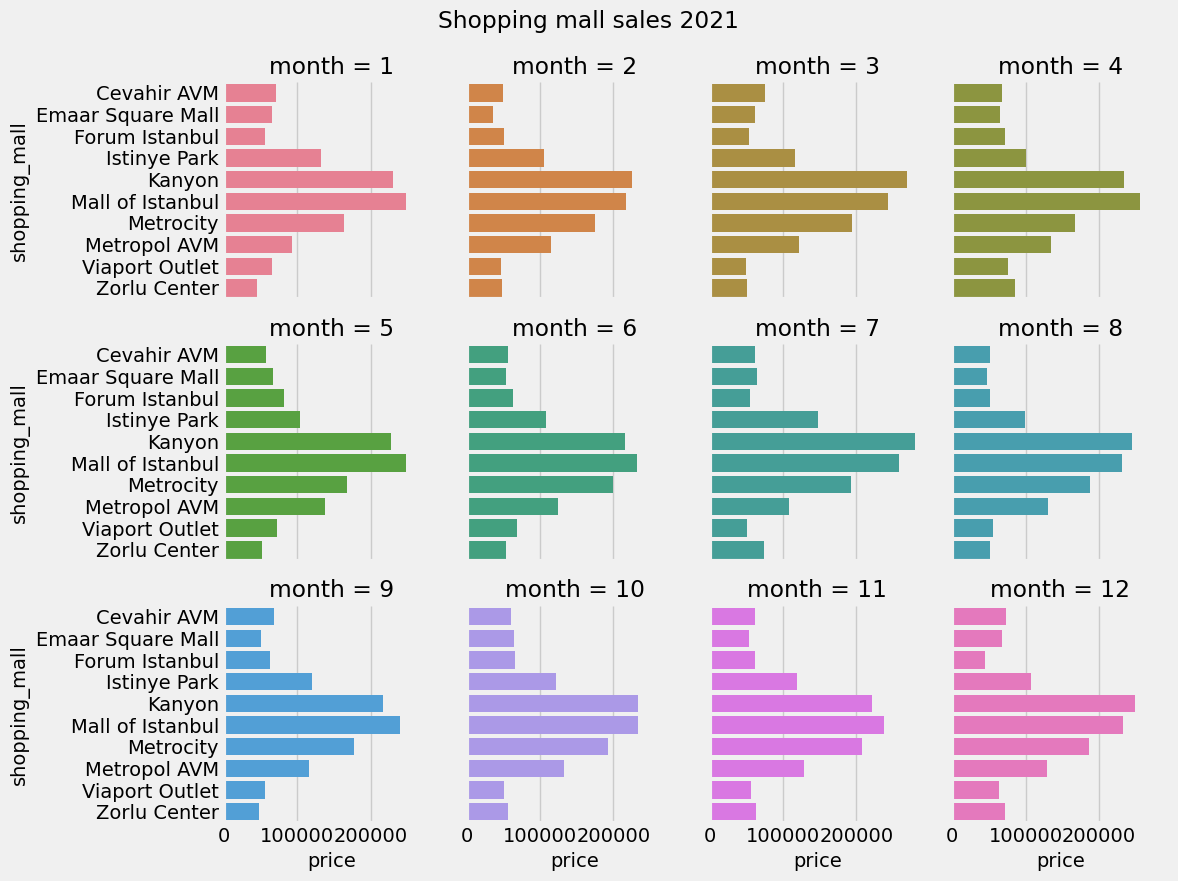

In [42]:
mall_21 = clothes_21.groupby(['month','shopping_mall']).sum().reset_index()
m = sns.FacetGrid(mall_21,col='month',col_wrap=4,hue='month')
m.map(sns.barplot,'price','shopping_mall')
m.fig.subplots_adjust(top=0.9)
m.fig.suptitle('Shopping mall sales 2021')

Text(0.5, 0.98, 'Shopping mall sales 2022')

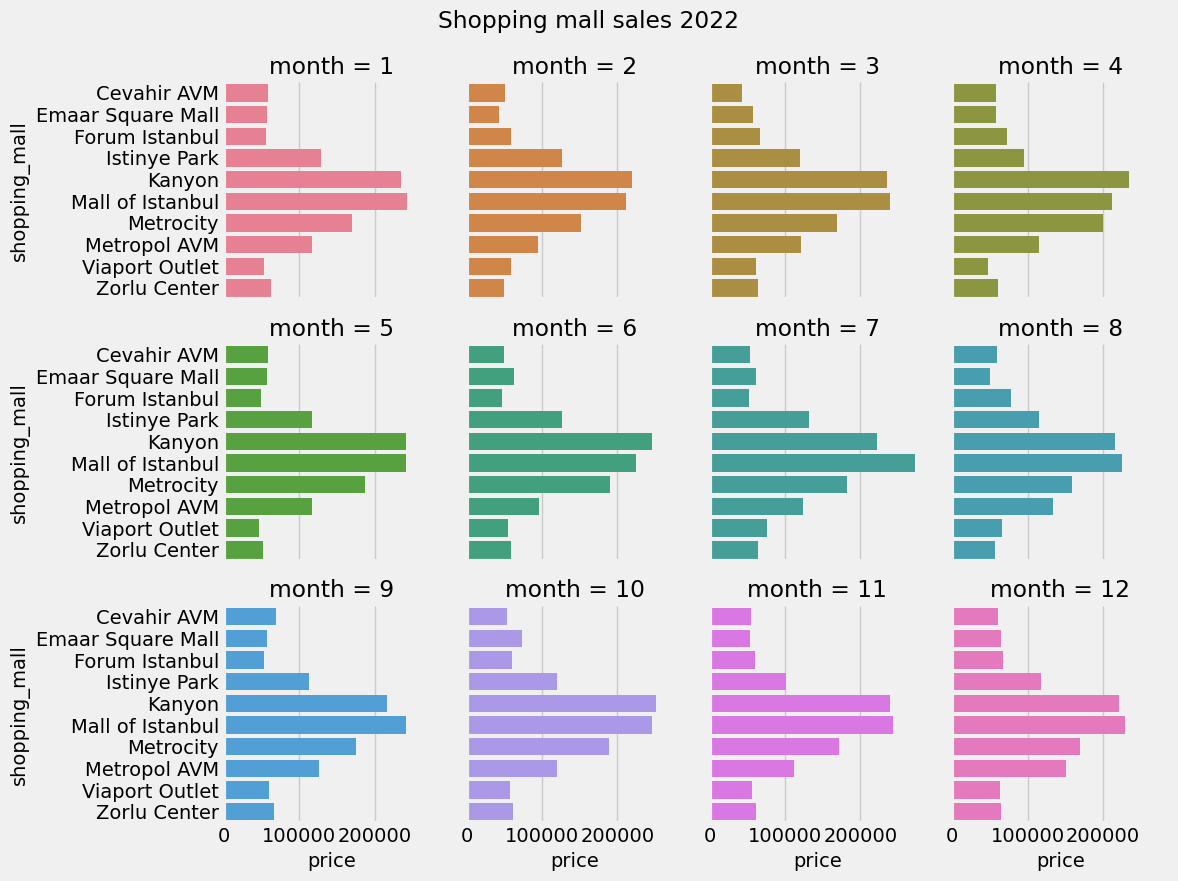

In [43]:
mall_22 = clothes_22.groupby(['month','shopping_mall']).sum().reset_index()
m = sns.FacetGrid(mall_22,col='month',col_wrap=4,hue='month')
m.map(sns.barplot,'price','shopping_mall')
m.fig.subplots_adjust(top=0.9)
m.fig.suptitle('Shopping mall sales 2022')

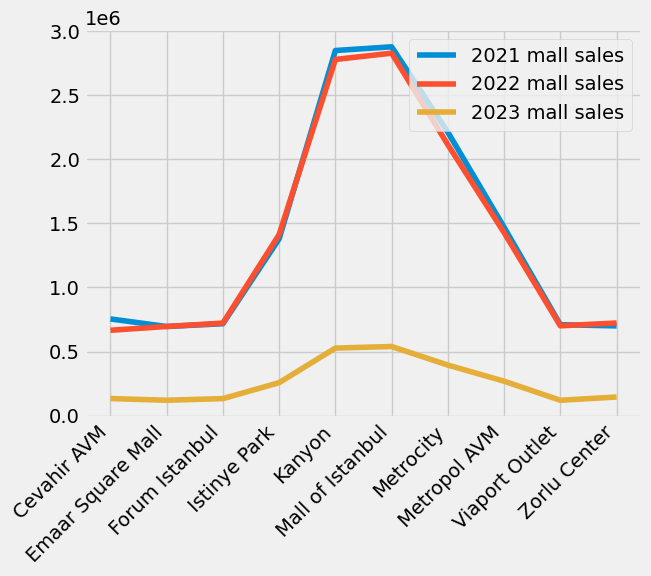

In [93]:
mall_21 = clothes_21.groupby('shopping_mall').sum().reset_index()
mall_22 = clothes_22.groupby('shopping_mall').sum().reset_index()
mall_23 = clothes_23.groupby('shopping_mall').sum().reset_index()
shopping_mall = mall_21['shopping_mall']
price = mall_21['price']
plt.plot(shopping_mall,price,label='2021 mall sales')
plt.plot(mall_22['shopping_mall'],mall_22['price'],label='2022 mall sales')
plt.plot(mall_23['shopping_mall'],mall_23['price'],label='2023 mall sales')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.savefig('mall.png', bbox_inches='tight',dpi=50)
plt.show()

In [45]:
list(set(cloth_df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('<M8[ns]'), dtype('float64')]

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

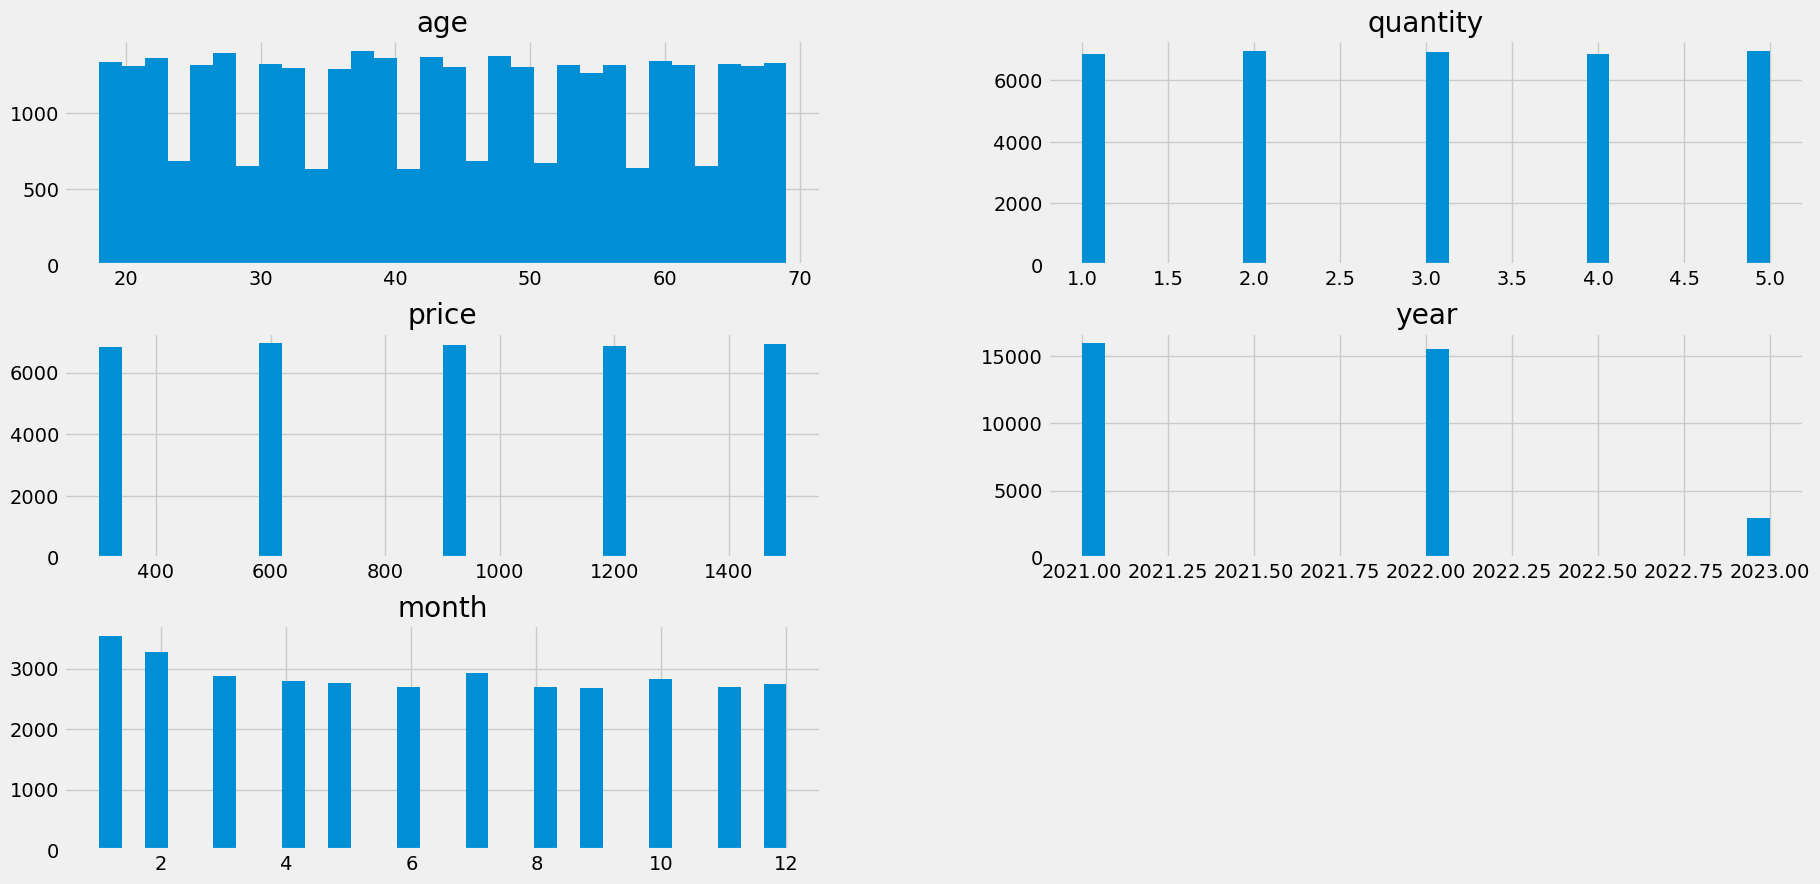

In [46]:
cloth_df_nums = cloth_df.select_dtypes(include=['int64','float64'])
cloth_df_nums.hist(bins = 30,figsize=(20,10))

In [47]:
nums_corr = cloth_df_nums.corr()['price']
nums_corr

age         0.011201
quantity    1.000000
price       1.000000
year        0.000663
month       0.006431
Name: price, dtype: float64

<Axes: >

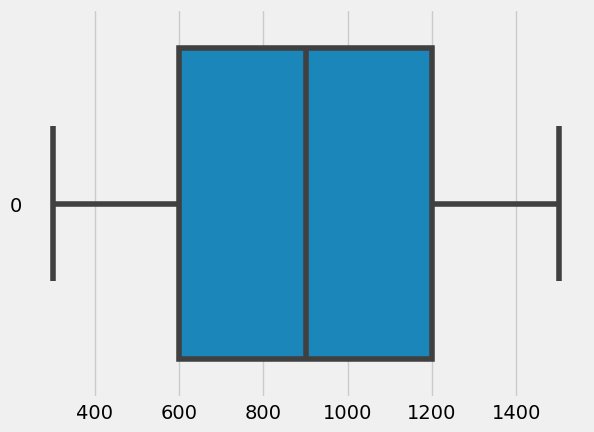

In [48]:
#identify outliers
sns.boxplot(cloth_df['price'],orient='h')

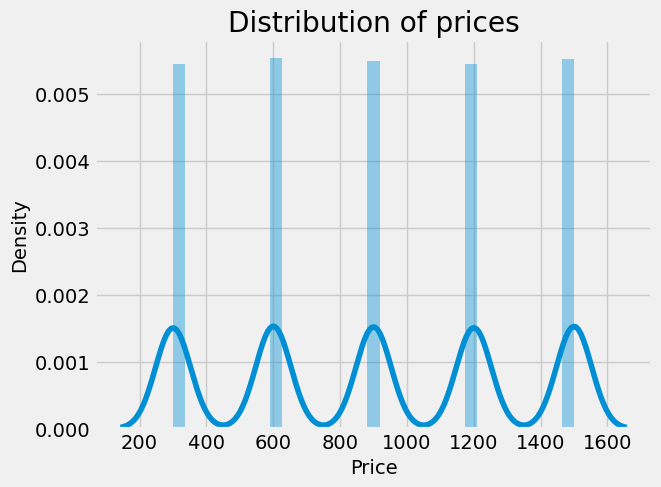

In [49]:
sns.distplot(cloth_df['price']) #the distribution of the sale of clothes is periodic
plt.xlabel('Price')
plt.ylabel('Density')
plt.title("Distribution of prices")

plt.savefig('dist.png', bbox_inches='tight')
plt.show()

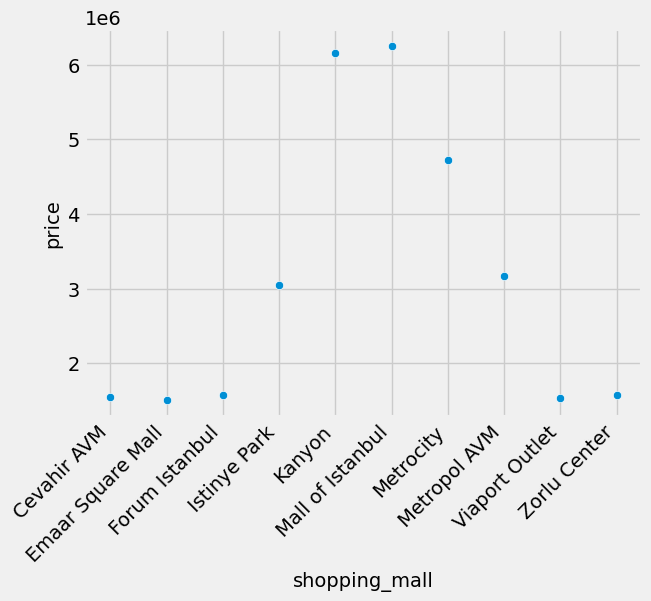

In [50]:
mall_clothing_sales = cloth_df.groupby(['shopping_mall','category'])['price'].sum().reset_index()
sns.scatterplot(x=mall_clothing_sales['shopping_mall'],y=mall_clothing_sales['price'],data=mall_clothing_sales)
plt.xticks(rotation = 45,ha='right')
plt.show()  # there are no outliers but the prices are being sold at similar prices in all the malls

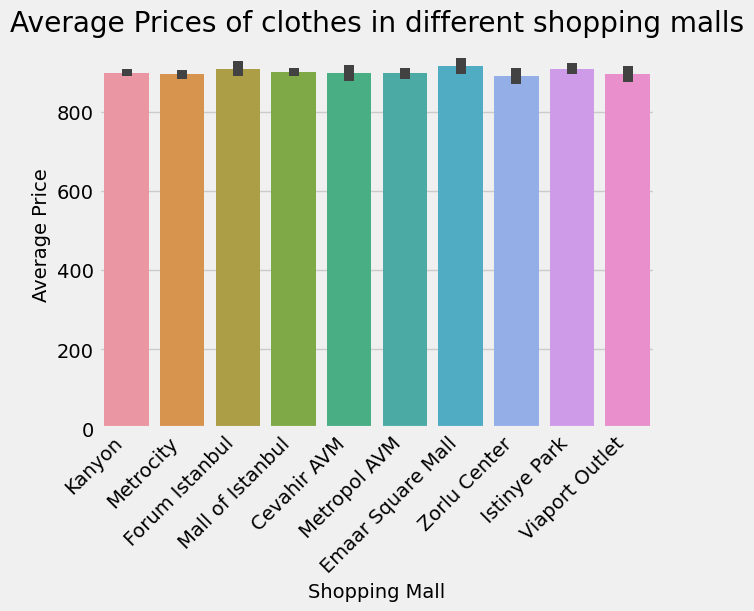

In [88]:
ax = sns.barplot(x = cloth_df['shopping_mall'],y = cloth_df['price'])
plt.xticks(rotation =45,ha='right')
plt.xlabel('Shopping Mall')
plt.ylabel('Average Price')
plt.title("Average Prices of clothes in different shopping malls")

plt.savefig('average_price.png', bbox_inches='tight',dpi=35)
plt.show()

In [52]:
import os
os.getcwd()


'C:\\Users\\user\\Data Analysis 1'

In [53]:
#which mall is making the least sales 
cloth_df.groupby('shopping_mall')['price'].sum()

shopping_mall
Cevahir AVM          1554414.40
Emaar Square Mall    1511803.04
Forum Istanbul       1572119.12
Istinye Park         3050313.20
Kanyon               6155541.04
Mall of Istanbul     6245565.04
Metrocity            4719958.32
Metropol AVM         3166444.16
Viaport Outlet       1530708.08
Zorlu Center         1568818.24
Name: price, dtype: float64

In [54]:
cloth_df['year'] = cloth_df['invoice_date'].dt.year
cloth_df['month'] = cloth_df['invoice_date'].dt.month
cloth_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022,5
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021,9
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,2022,5
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,2021,1
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity,2021,4


In [55]:
mall_sales = pd.pivot_table(index='shopping_mall',values = 'price',aggfunc='sum',data=cloth_df)
mall_sales.reset_index(inplace=True)
mall_sales

,shopping_mall,price
0,Cevahir AVM,1554414.40
1,Emaar Square Mall,1511803.04
2,Forum Istanbul,1572119.12
3,Istinye Park,3050313.20
4,Kanyon,6155541.04
5,Mall of Istanbul,6245565.04
6,Metrocity,4719958.32
7,Metropol AVM,3166444.16
8,Viaport Outlet,1530708.08
9,Zorlu Center,1568818.24


In [56]:
total_sales = pd.pivot_table(index='shopping_mall',columns = ['gender','year'],values='price',aggfunc='sum',data=cloth_df)
total_sales.reset_index(inplace=True)
# total_sales.sort_values(by='price',ascending = True)
total_sales

gender      shopping_mall      Female                               Male  \
year                             2021        2022       2023        2021   
0             Cevahir AVM   455221.36   390104.00   82221.92   299479.84   
1       Emaar Square Mall   394605.20   401206.96   64517.20   300980.24   
2          Forum Istanbul   430314.72   448919.68   81921.84   286876.48   
3            Istinye Park   856428.32   862129.84  146138.96   523339.52   
4                  Kanyon  1700553.36  1723659.52  318684.96  1148406.16   
5        Mall of Istanbul  1783975.60  1638136.72  304581.20  1093791.60   
6               Metrocity  1304747.84  1286142.88  230461.44   906841.76   
7            Metropol AVM   863330.16   867831.36  165644.16   606161.60   
8          Viaport Outlet   425213.36   408108.80   71719.12   284475.84   
9            Zorlu Center   400906.88   422212.56   87023.20   299479.84   

gender                         
year          2022       2023  
0        276073.60   51313.68  
1        294678.56   55814.88  
2        273072.80   51013.60  
3        550946.88  111329.68  
4       1055681.44  208555.60  
5       1190117.28  234962.64  
6        827620.64  164143.76  
7        560249.36  103227.52  
8        292878.08   48312.88  
9        300680.16   58515.60

In [57]:
#flattening the multilevel dataframe 
flatten_cloth_df = total_sales.copy()
flatten_cloth_df.columns = [' '.join(map(str, col)).strip() for  col in flatten_cloth_df.columns.values]
flatten_cloth_df.reset_index(inplace=True)
flatten_cloth_df.head()

,index,shopping_mall,Female 2021,Female 2022,Female 2023,Male 2021,Male 2022,Male 2023
0,0,Cevahir AVM,455221.36,390104.00,82221.92,299479.84,276073.60,51313.68
1,1,Emaar Square Mall,394605.20,401206.96,64517.20,300980.24,294678.56,55814.88
2,2,Forum Istanbul,430314.72,448919.68,81921.84,286876.48,273072.80,51013.60
3,3,Istinye Park,856428.32,862129.84,146138.96,523339.52,550946.88,111329.68
4,4,Kanyon,1700553.36,1723659.52,318684.96,1148406.16,1055681.44,208555.60


In [58]:
year_2021 = [col for col in flatten_cloth_df.columns if '2021' in col]
year_2022 = [col for col in flatten_cloth_df.columns if '2022' in col]
year_2023 = [col for col in flatten_cloth_df.columns if '2023' in col]

total_sales_df = pd.DataFrame({
    'shopping_mall': flatten_cloth_df['shopping_mall'],
    'year_2021': flatten_cloth_df[year_2021].sum(axis=1),
    'year_2022': flatten_cloth_df[year_2022].sum(axis=1),
    'year_2023': flatten_cloth_df[year_2023].sum(axis=1),

})
total_sales_df

,shopping_mall,year_2021,year_2022,year_2023
0,Cevahir AVM,754701.20,666177.60,133535.60
1,Emaar Square Mall,695585.44,695885.52,120332.08
2,Forum Istanbul,717191.20,721992.48,132935.44
3,Istinye Park,1379767.84,1413076.72,257468.64
4,Kanyon,2848959.52,2779340.96,527240.56
5,Mall of Istanbul,2877767.20,2828254.00,539543.84
6,Metrocity,2211589.60,2113763.52,394605.20
7,Metropol AVM,1469491.76,1428080.72,268871.68
8,Viaport Outlet,709689.20,700986.88,120032.00
9,Zorlu Center,700386.72,722892.72,145538.80


In [59]:
total_sales_df['total_sales'] = total_sales_df[['year_2021', 'year_2022', 'year_2023']].sum(axis=1)
total_sales_df.head()

,shopping_mall,year_2021,year_2022,year_2023,total_sales
0,Cevahir AVM,754701.20,666177.60,133535.60,1554414.40
1,Emaar Square Mall,695585.44,695885.52,120332.08,1511803.04
2,Forum Istanbul,717191.20,721992.48,132935.44,1572119.12
3,Istinye Park,1379767.84,1413076.72,257468.64,3050313.20
4,Kanyon,2848959.52,2779340.96,527240.56,6155541.04


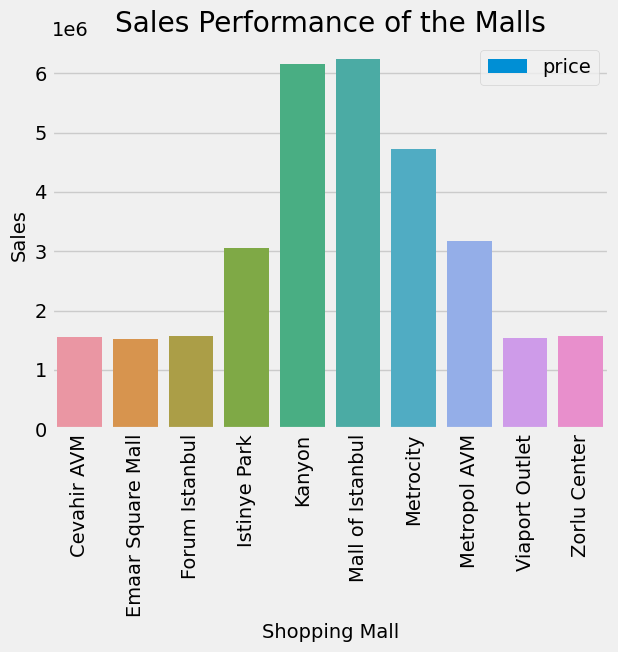

In [60]:
mall_sales.plot(kind='bar')
sns.barplot(x = 'shopping_mall',y='price',data=mall_sales)
plt.xlabel('Shopping Mall')
plt.ylabel('Sales')
plt.title('Sales Performance of the Malls')
plt.savefig('sales.png', bbox_inches='tight')
plt.show()

In [61]:
sns.scatterplot(x=total_sales['shopping_mall'],y=total_sales['total_sales'],data=total_sales)
plt.xticks(rotation = 45,ha='right')
plt.show() #have a relationship that follows a linear relationship

KeyError: 'total_sales'

In [ ]:
#evaluating the qauntities
total_quantity = pd.pivot_table(index='shopping_mall',aggfunc='sum',values ='quantity',data=cloth_df,columns =['gender','year'])
# total_quantity.reset_index(inplace=True)
# total_quantity.sort_values(by='quantity',ascending=True)
total_quantity
#might be that Emaar Square mall was selling less because they were selling less quantity

In [ ]:
sns.barplot(x = 'shopping_mall',y='quantity',data=total_quantity)
plt.xticks(rotation = 45,ha='right')
plt.show()

# Analyzing the mall with the least sales of clothes (Emaar Square Mall)

In [95]:
#sales and age
emaar_df = cloth_df.loc[cloth_df['shopping_mall'] == 'Emaar Square Mall']
emaar_df.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
20,I183746,C220180,Male,23,Clothing,1,300.08,Credit Card,2023-02-15,Emaar Square Mall,2023,2
31,I331891,C501658,Male,23,Clothing,1,300.08,Credit Card,2021-11-21,Emaar Square Mall,2021,11
125,I273890,C891545,Female,41,Clothing,3,900.24,Debit Card,2021-08-26,Emaar Square Mall,2021,8


In [ ]:
emaar_df.isnull().sum()

In [96]:
emaar_df['age'].mean()

43.79648697758934

In [97]:
emaar_df.describe()

,age,quantity,price,year,month
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,43.796487,3.051484,915.689303,2021.618413,6.411872
std,14.609454,1.404888,421.578913,0.630344,3.539211
min,18.000000,1.000000,300.080000,2021.000000,1.000000
25%,32.000000,2.000000,600.160000,2021.000000,3.000000
50%,44.000000,3.000000,900.240000,2022.000000,6.000000
75%,56.000000,4.000000,1200.320000,2022.000000,10.000000
max,69.000000,5.000000,1500.400000,2023.000000,12.000000


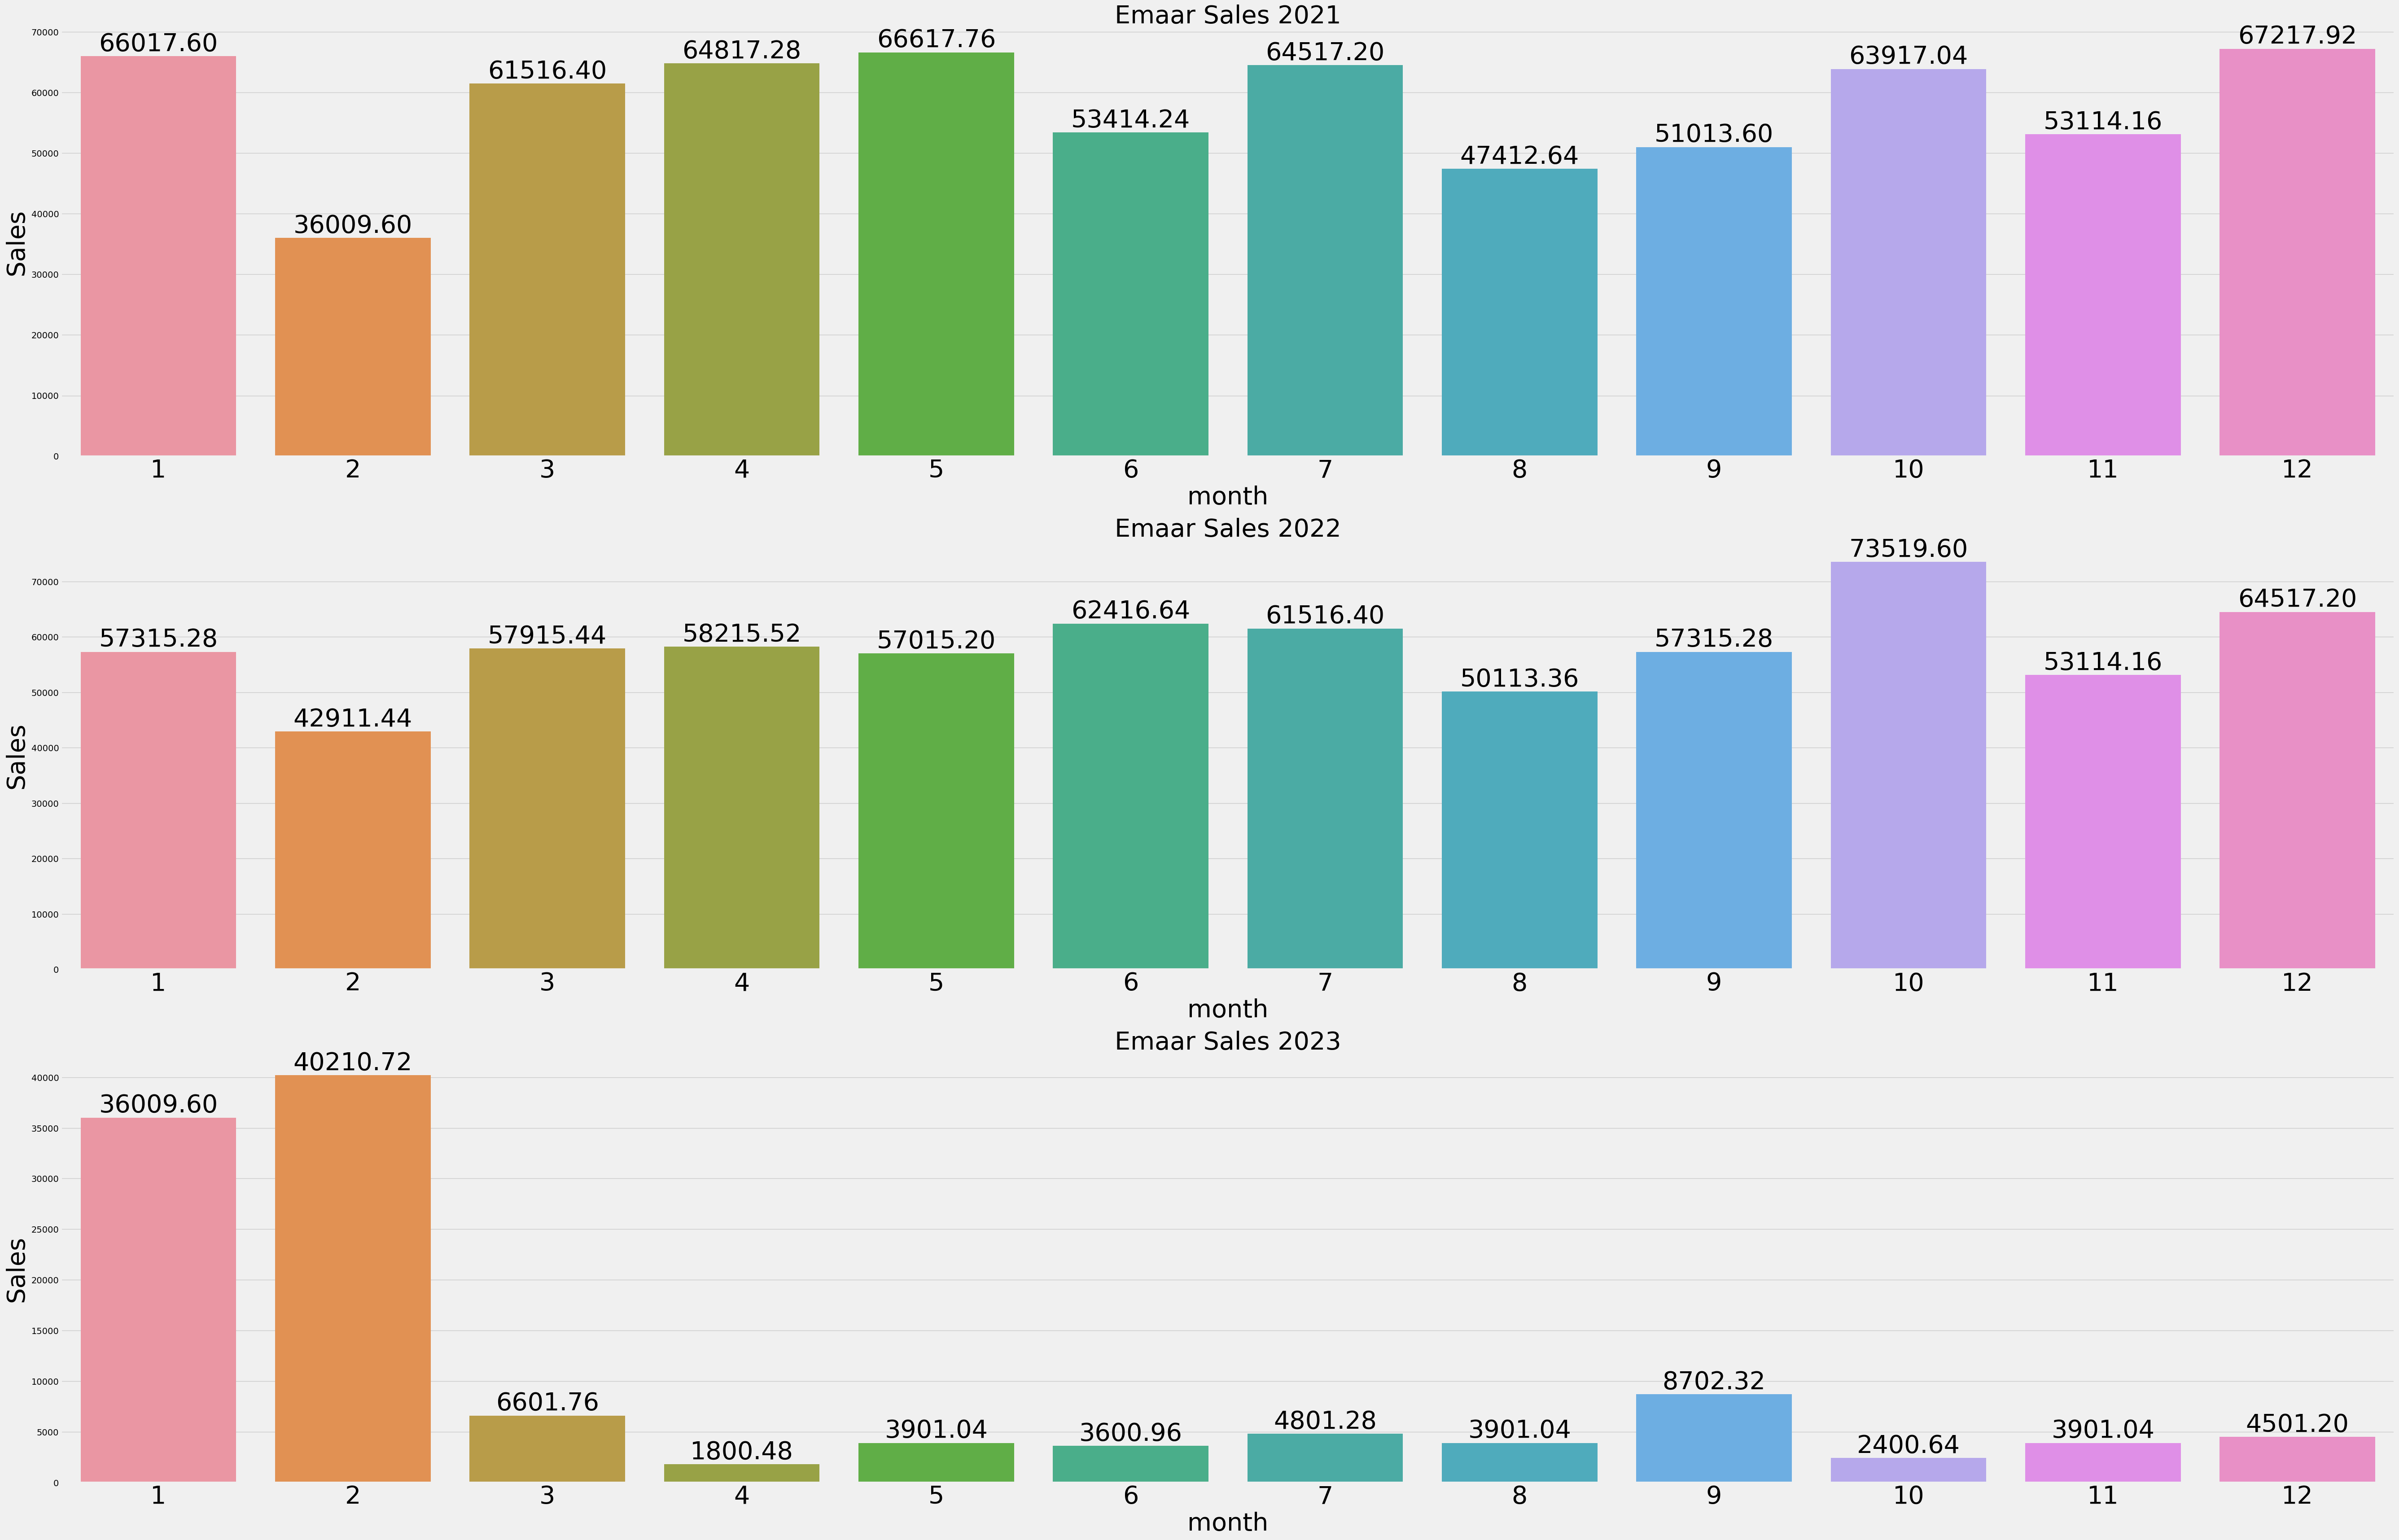

In [101]:
#How much did emaar mall make every month for the 3year(for each year)
emaar_21 = emaar_df.loc[emaar_df['year'] == 2021]
emaar_22 = emaar_df.loc[emaar_df['year'] == 2022]
emaar_23 = emaar_df.loc[emaar_df['year'] == 2023]

monthly_emaar_21 = emaar_21.groupby('month').sum().reset_index()
monthly_emaar_22 = emaar_22.groupby('month').sum().reset_index()
monthly_emaar_23 = emaar_23.groupby('month').sum().reset_index()

fig,axes = plt.subplots(3,1,figsize=(80,40))
fig.subplots_adjust(0.3)
sns.barplot(monthly_emaar_21,x='month',y='price',ax=axes[0])
axes[0].set_xlabel(axes[0].get_xlabel(),size=40)
axes[0].set_ylabel('Sales',size=40)
axes[0].bar_label(axes[0].containers[0],size=40,fmt='%.2f')
axes[0].set_xticklabels(axes[0].get_xticklabels(),size=40)
axes[0].set_title('Emaar Sales 2021',size=40)

sns.barplot(monthly_emaar_22,x='month',y='price',ax = axes[1])
axes[1].set_xlabel(axes[1].get_xlabel(),size=40)
axes[1].set_ylabel('Sales',size=40)
axes[1].bar_label(axes[1].containers[0],size=40,fmt='%.2f')
axes[1].set_xticklabels(axes[1].get_xticklabels(),size=40)
axes[1].set_title('Emaar Sales 2022',size=40)

sns.barplot(monthly_emaar_23,x='month',y='price',ax = axes[2])
axes[2].set_xlabel(axes[2].get_xlabel(),size=40)
axes[2].set_ylabel('Sales',size=40)
axes[2].bar_label(axes[2].containers[0],size=40,fmt='%.2f')
axes[2].set_xticklabels(axes[2].get_xticklabels(),size=40)
axes[2].set_title('Emaar Sales 2023',size=40)
plt.savefig('emaar sales.png', bbox_inches='tight',dpi=11)
plt.show()

in 2021,December had the highest sales.
in 2022,October had the highest sales 
in 2023,Feb had the highest sales 


In [ ]:
monthly_emaar_21.sort_values(by= 'price',ascending=False)

In [ ]:
monthly_emaar_22.sort_values(by= 'price',ascending=False)

In [ ]:
monthly_emaar_23.sort_values(by= 'price',ascending=False)

In [ ]:
in 2021,feb had the least sales 
in 2022,feb had the least sales 
in 2023 ,april had the least sales 

In [ ]:
#selecting the numbers 
list(set(emaar_df.dtypes.to_list()))

In [ ]:
emaar_nums = emaar_df.select_dtypes(include=['int64','float64'])
emaar_nums.hist(bins=30,figsize=(20,10))

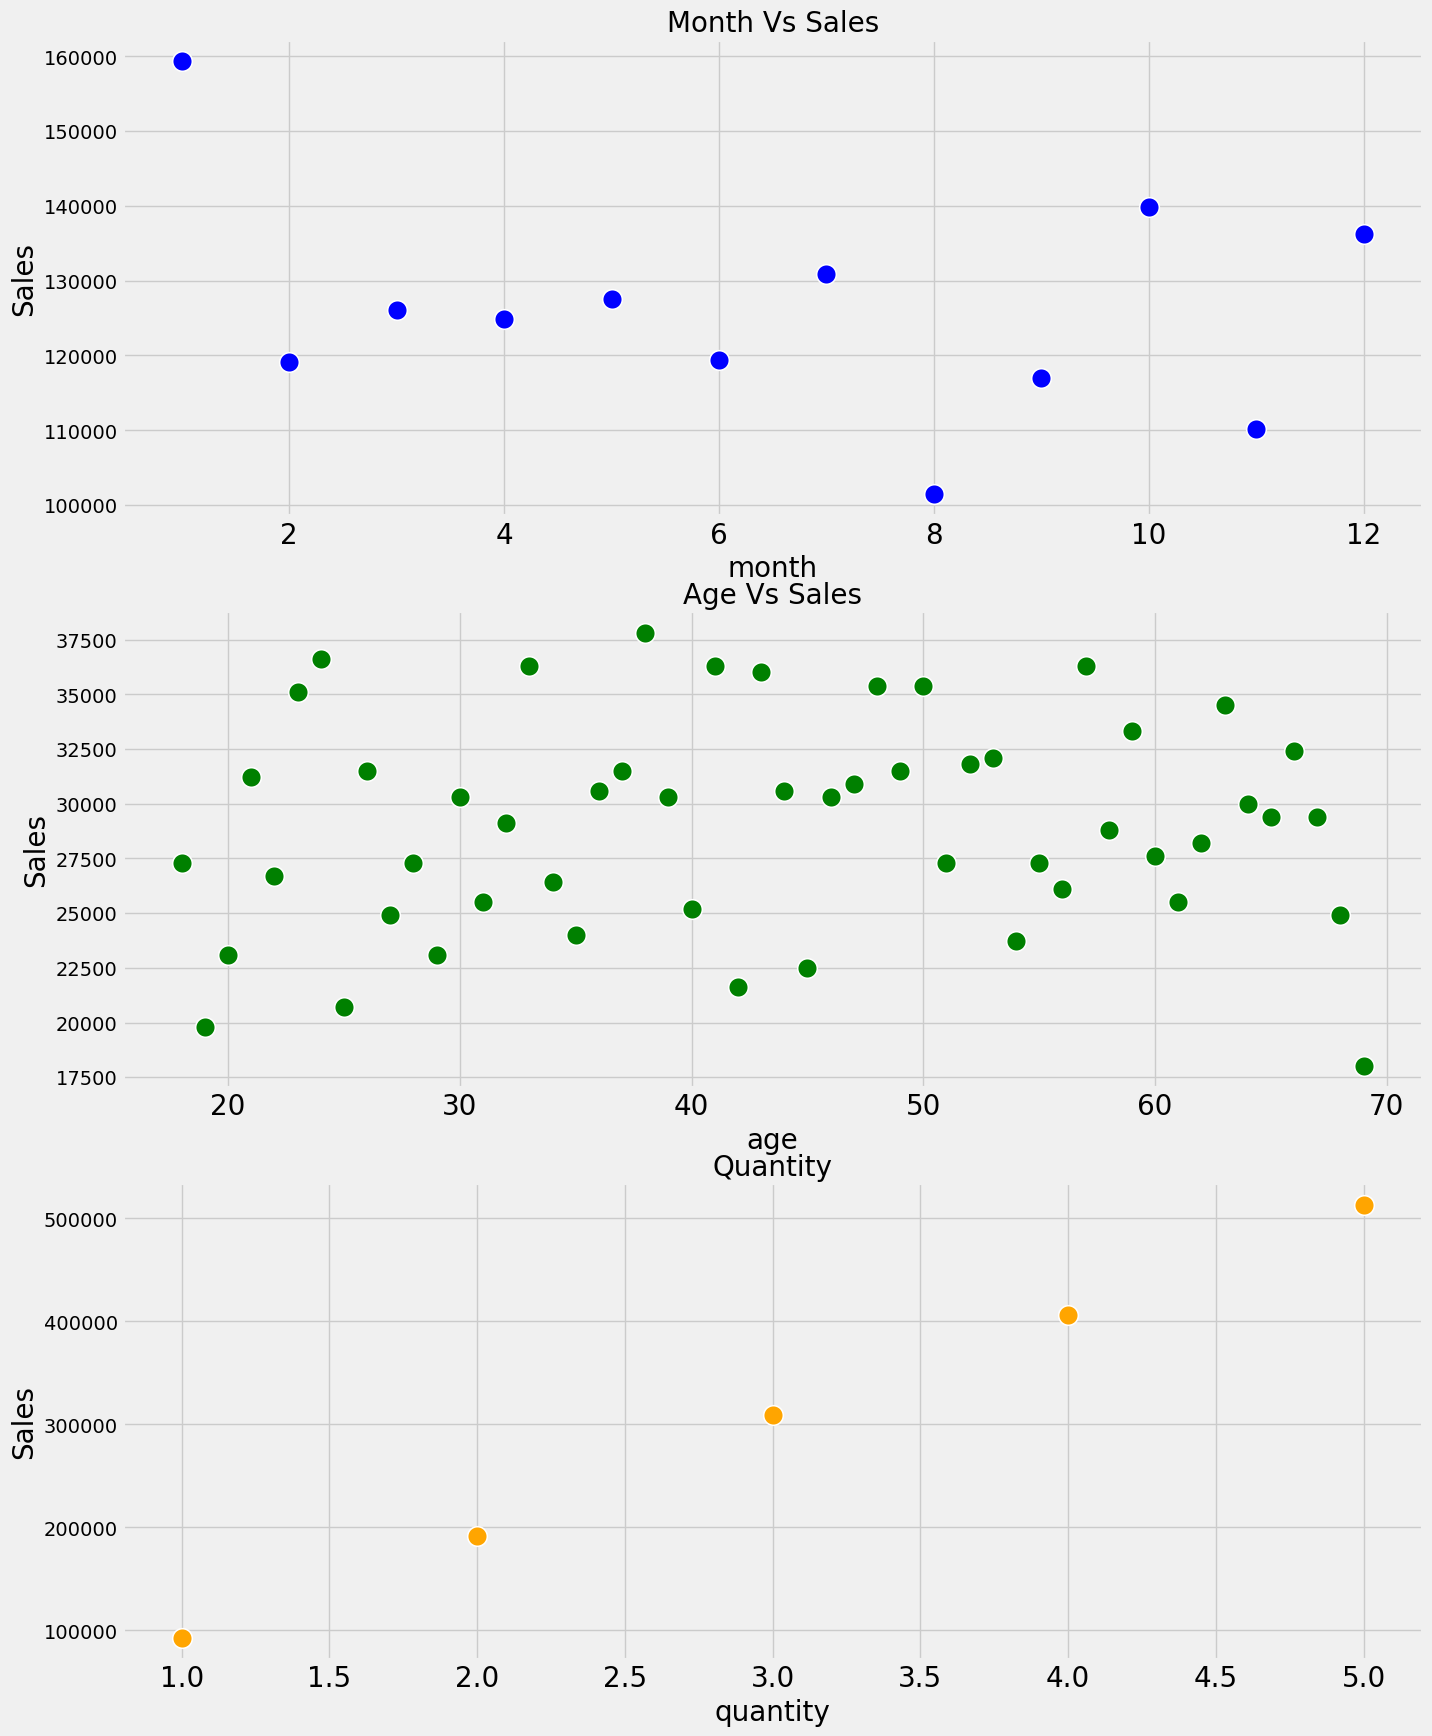

In [121]:
#sales is the dependent variable,i want to know the relationship with the other independent variables
fig,axes = plt.subplots(3,1,figsize=(20,20))
fig.subplots_adjust(0.3)
monthly_dist= emaar_df.groupby('month')['price'].sum().reset_index()
sns.scatterplot(data=monthly_dist,x='month',y='price',ax=axes[0],s=200,color='blue')
axes[0].set_xlabel(axes[0].get_xlabel(),size=20)
axes[0].set_ylabel('Sales',size=20)
axes[0].set_xticklabels(axes[0].get_xticklabels(),size=20)
axes[0].set_title('Month Vs Sales',size=20)

age_corr = emaar_df.groupby('age')['price'].sum().reset_index()
sns.scatterplot(data=age_corr,x='age',y='price',ax=axes[1],s=200,color='green')
axes[1].set_xlabel(axes[1].get_xlabel(),size=20)
axes[1].set_ylabel('Sales',size=20)
axes[1].set_xticklabels(axes[1].get_xticklabels(),size=20)
axes[1].set_title('Age Vs Sales',size=20)


quantity_corr = emaar_df.groupby('quantity')['price'].sum().reset_index()
sns.scatterplot(data=quantity_corr,x='quantity',y='price',ax=axes[2],s=200,color='orange')
axes[2].set_xlabel(axes[2].get_xlabel(),size=20)
axes[2].set_ylabel('Sales',size=20)
axes[2].set_xticklabels(axes[2].get_xticklabels(),size=20)
axes[2].set_title('Quantity',size=20)
plt.savefig('scatter.png', bbox_inches='tight',dpi=20)
plt.show()


age and month have a non-linear relationship with sales.
quantity has a linear relationship with sales 

In [ ]:
emaar_df.head(3)

In [ ]:
emaar_df.groupby('year')['price'].sum().reset_index().sort_values(by='price',ascending=False)

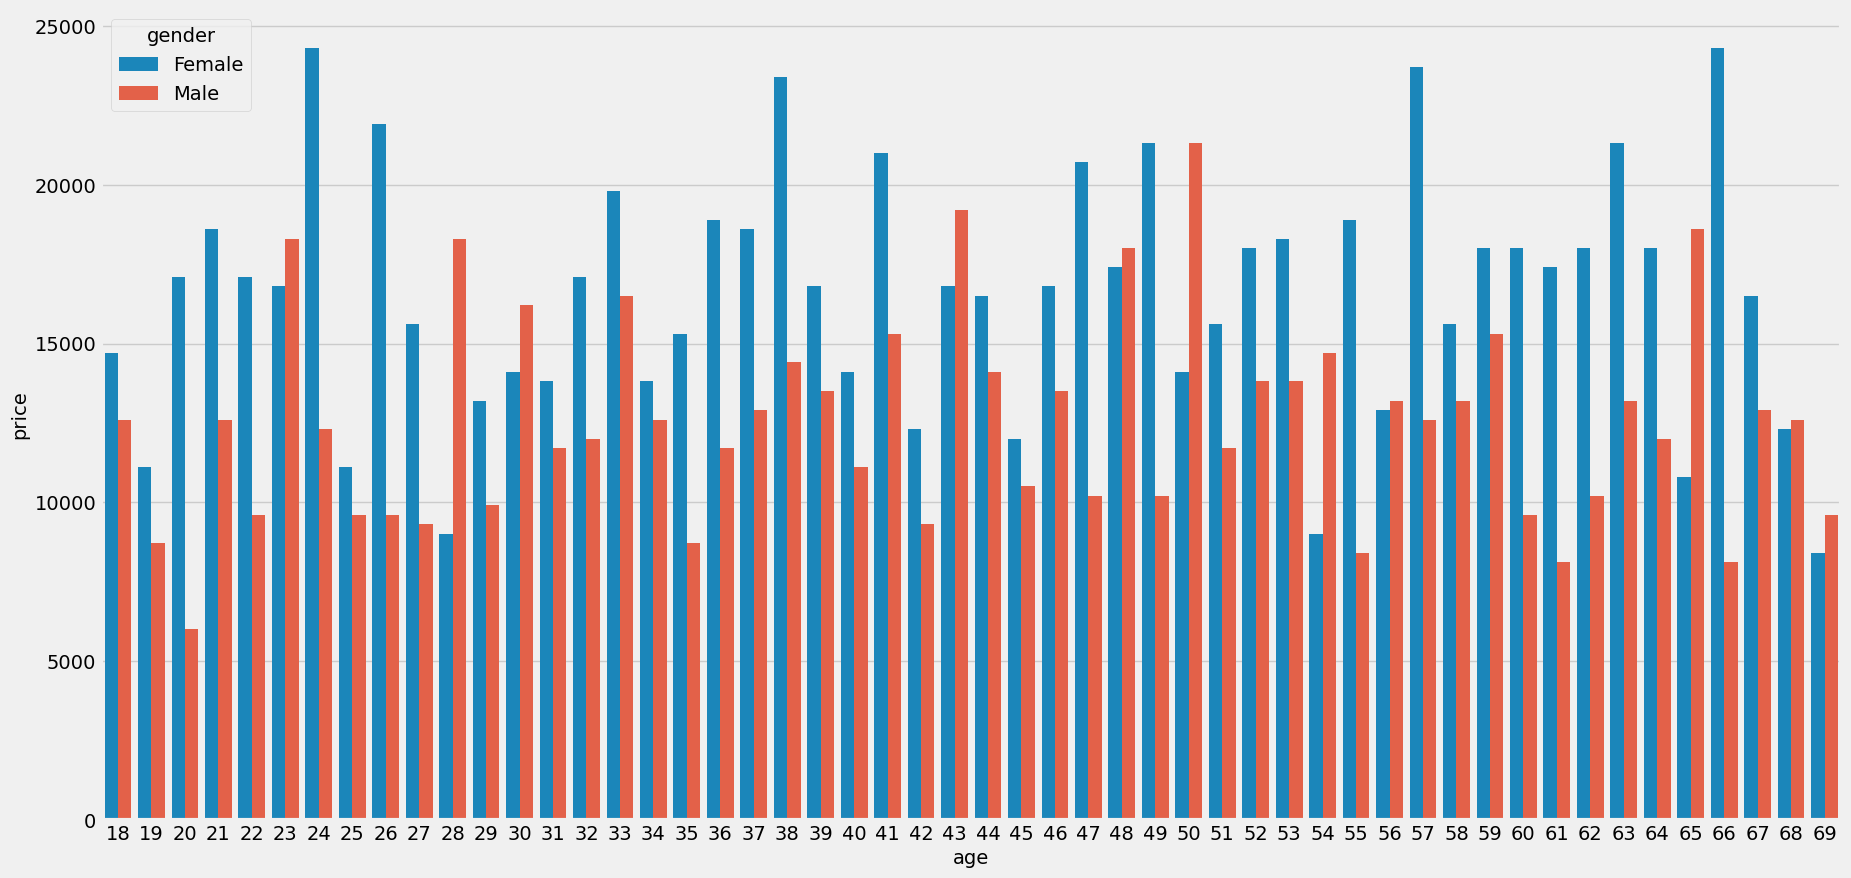

In [106]:
emaar_prices= emaar_df.groupby(['age','gender'])['price'].sum().reset_index()
# emaar_prices.head()
plt.figure(figsize=(20,10))
sns.barplot(data=emaar_prices,x='age',y='price',hue='gender')
plt.savefig('emaar age-gender.png', bbox_inches='tight',dpi=35)

In [ ]:
emaar_prices.loc[emaar_prices['gender'] == 'Female']['price'].idxmax()
emaar_prices.loc[12] #most of the revenue came from 24year old women

In [ ]:
emaar_prices.loc[emaar_prices['gender'] == 'Male']['price'].idxmax()
emaar_prices.loc[65] #most of the male clothes were bought by 50year olds

In [ ]:
emaar_df.groupby('gender')['price'].sum() # most of the buyers were women

In [ ]:
payment_method_distribution = emaar_df.groupby(['month', 'payment_method']).size().unstack()

# Plot the bar plot
payment_method_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))


In [ ]:
payment_method_distribution.stack()
#like the usage of the different methods of payment in the various months 
#month 10 had more people using cash than any other month 
#month 1 and month 12 had the most people using credit cards (61)
#it is in month 10 that debit cards were mostly used like

In [ ]:
emaar_df.groupby('age')['price'].sum().idxmax()

In [ ]:
emaar_df.groupby('age')['price'].sum().idxmin()

In [ ]:
from scipy.stats import linregress
emaar_sales = pd.pivot_table(index='age',values='price',aggfunc='sum',data=emaar_df)
emaar_sales.reset_index(inplace=True)
emaar_sales
#y = mx + c
m,intercept,rv,pv,stderr = linregress(emaar_sales['age'],emaar_sales['price'])
x = emaar_sales['age']
y = m * x + intercept
plt.plot(x,y)
sns.scatterplot(x='age',y='price',data=emaar_sales)

In [ ]:
sns.heatmap(emaar_sales.corr(),annot=True)

In [ ]:
emaar_df.groupby('gender')['price'].sum() # highest amount of sales came from women in emmar_mall

In [ ]:
emaar_df['invoice_date'].dtype

In [ ]:
emaar_df['year'] = emaar_df['invoice_date'].dt.year
emaar_df['year']

In [ ]:
emaar_df['month'] = emaar_df['invoice_date'].dt.month
emaar_df['month']

In [ ]:
emaar_df.head()

In [ ]:
emaar_df.groupby('year')['price'].sum()

In [ ]:
emaar_df.groupby('year')['price'].sum().idxmax()

In [ ]:
emaar_df.groupby('year')['price'].sum().idxmin()

In [ ]:
emaar_df.groupby('month')['price'].sum()
pd.pivot_table(index = 'month',values = 'price',aggfunc='sum',data=emaar_df).plot(kind'bar')

In [ ]:
yearly_sales = pd.pivot_table(index='year',values='price',aggfunc='sum',data=emaar_df)
yearly_sales.reset_index(inplace=True)
sns.barplot(x='year',y='price',data=yearly_sales)
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Yearly Sales')
plt.savefig('yearsales.png', bbox_inches='tight')
plt.show()

In [ ]:
emaar_df.groupby('payment_method')['month'].count().plot(kind='bar')

In [ ]:
#creating the model
#the features are:


In [ ]:
pd.pivot_table(index = 'year',columns ='gender',values = 'price',aggfunc='sum',data=emaar_df)

In [ ]:
total_sales_df.head()

In [ ]:
for mall in total_sales_df['shopping_mall']:
    print(mall)

In [ ]:
mall_mapping = {
    'Cevahir AVM': 0,
    'Emaar Square Mall': 1,
    'Forum Istanbul': 2,
    'Istinye Park': 3,
    'Kanyon': 4,
    'Mall of Istanbul': 5,
    'Metrocity': 6,
    'Metropol AVM': 7,
    'Viaport Outlet': 8,
    'Zorlu Center': 9
}
total_sales_df['shopping_mall_encoded'] = total_sales_df['shopping_mall'].map(mall_mapping)
total_sales_df

In [ ]:
#splitting the data
X = total_sales_df[['shopping_mall_encoded','year_2021','year_2022','year_2023']]

In [ ]:
y = total_sales_df['total_sales']

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split